## Lesson 11 - Sentiment Analysis




### Table of Contents
* [SnowNLP情感分析](#SnowNLP)
* [Sentiment Analysis on the Texts from AFINN marketing model](#AFINN)
* [Sentiment Classification with Naive Bayes (positive and negative)](#Sentiment-Classification-with-Naive-Bayes-pn)
* [Sentiment Classification with XGBoost (positive and negative)](#Sentiment-Classification-with-XGBoost-pn)
* [Sentiment Classification with Naive Bayes](#Sentiment-Classification-with-Naive-Bayes)
* [Sentiment Classification with XGBoost](#Sentiment-Classification-with-XGBoost)
* [Sentiment score using Recurrent Neural Networks (RNN) with Keras](#RNN)
* [Google Cloud Natural Language](#Google-Cloud-Natural-Language)


<a id="SnowNLP"></a>
## SnowNLP 情感分析
SnowNLP是一個封裝好的python package，可以做情感分析，計算文字相似度（BM25方法）、提取關鍵詞等。

安裝方法：pip install SnowNLP ,目前僅適用於python3版本以上

In [1]:
# pip install snownlp

import jieba
from snownlp import SnowNLP

In [2]:
s = '陽明山風景迷人，夜景更美'
res = SnowNLP(s)

# 分句成 list
n= 5
lst = res.summary(n)
print(lst)

# 整句的情感評分
print('情感評分: {}'.format(res.sentiments))

# 分詞
print('分詞: {}'.format(res.words))

# 轉拼音
print('轉拼音: {}'.format(res.pinyin))

['陽明山風景迷人', '夜景更美']
情感評分: 0.9990470541442882
分詞: ['陽', '明', '山', '風景', '迷人', '，', '夜景', '更', '美']
轉拼音: ['陽', 'ming', 'shan', '風', 'jing', 'mi', 'ren', '，', 'ye', 'jing', 'geng', 'mei']


In [3]:
s = '李柏毅認為，韓國瑜可以批評呱吉，可以批評演出很爛，但不能「審查」演出的內容，因為這樣就失去了創作的本質，也失去了台灣的價值！他難過指出，正逢教育部門的質詢，國民黨的議員們又開始拿大港開唱、拿呱吉、拿滅火器，一個一個出來蹭熱度，直言「如果我們事事都要審查、都追求真善美，那跟閹割版的中國有嘻哈、跟共產黨又有何異呢？」'
res = SnowNLP(s)

# 句子切分
print('句子切分: {}'.format(res.sentences))

# 自動文摘
print('自動文摘: {}'.format(res.summary(n)))

# 轉簡體
print('轉簡體: {}'.format(res.han))

# 標註詞性
print('標註詞性:')
# for x in res.tags:
#     print(x)
# list(zip(*res.tags))

句子切分: ['李柏毅認為', '韓國瑜可以批評呱吉', '可以批評演出很爛', '但不能「審查」演出的內容', '因為這樣就失去了創作的本質', '也失去了台灣的價值', '他難過指出', '正逢教育部門的質詢', '國民黨的議員們又開始拿大港開唱、拿呱吉、拿滅火器', '一個一個出來蹭熱度', '直言「如果我們事事都要審查、都追求真善美', '那跟閹割版的中國有嘻哈、跟共產黨又有何異呢', '」']
自動文摘: ['但不能「審查」演出的內容', '因為這樣就失去了創作的本質', '可以批評演出很爛', '國民黨的議員們又開始拿大港開唱、拿呱吉、拿滅火器', '直言「如果我們事事都要審查、都追求真善美']
轉簡體: 李柏毅认为，韩国瑜可以批评呱吉，可以批评演出很烂，但不能「审查」演出的内容，因为这样就失去了创作的本质，也失去了台湾的价值！他难过指出，正逢教育部门的质询，国民党的议员们又开始拿大港开唱、拿呱吉、拿灭火器，一个一个出来蹭热度，直言「如果我们事事都要审查、都追求真善美，那跟阉割版的中国有嘻哈、跟共产党又有何异呢？」
標註詞性:


In [4]:
print('詞頻: {}'.format(res.tf))

詞頻: [{'李': 1}, {'柏': 1}, {'毅': 1}, {'認': 1}, {'為': 1}, {'，': 1}, {'韓': 1}, {'國': 1}, {'瑜': 1}, {'可': 1}, {'以': 1}, {'批': 1}, {'評': 1}, {'呱': 1}, {'吉': 1}, {'，': 1}, {'可': 1}, {'以': 1}, {'批': 1}, {'評': 1}, {'演': 1}, {'出': 1}, {'很': 1}, {'爛': 1}, {'，': 1}, {'但': 1}, {'不': 1}, {'能': 1}, {'「': 1}, {'審': 1}, {'查': 1}, {'」': 1}, {'演': 1}, {'出': 1}, {'的': 1}, {'內': 1}, {'容': 1}, {'，': 1}, {'因': 1}, {'為': 1}, {'這': 1}, {'樣': 1}, {'就': 1}, {'失': 1}, {'去': 1}, {'了': 1}, {'創': 1}, {'作': 1}, {'的': 1}, {'本': 1}, {'質': 1}, {'，': 1}, {'也': 1}, {'失': 1}, {'去': 1}, {'了': 1}, {'台': 1}, {'灣': 1}, {'的': 1}, {'價': 1}, {'值': 1}, {'！': 1}, {'他': 1}, {'難': 1}, {'過': 1}, {'指': 1}, {'出': 1}, {'，': 1}, {'正': 1}, {'逢': 1}, {'教': 1}, {'育': 1}, {'部': 1}, {'門': 1}, {'的': 1}, {'質': 1}, {'詢': 1}, {'，': 1}, {'國': 1}, {'民': 1}, {'黨': 1}, {'的': 1}, {'議': 1}, {'員': 1}, {'們': 1}, {'又': 1}, {'開': 1}, {'始': 1}, {'拿': 1}, {'大': 1}, {'港': 1}, {'開': 1}, {'唱': 1}, {'、': 1}, {'拿': 1}, {'呱': 1}, {'吉': 1}, {'、': 1}, {'拿': 1}, {'滅':

In [5]:
print('逆向檔案頻率： {}'.format(res.idf))

逆向檔案頻率： {'李': 4.647590901872043, '柏': 4.647590901872043, '毅': 4.647590901872043, '認': 4.647590901872043, '為': 4.130354999745133, '，': 2.642452918616397, '韓': 4.647590901872043, '國': 3.7874311278424324, '瑜': 4.647590901872043, '可': 4.130354999745133, '以': 4.130354999745133, '批': 4.130354999745133, '評': 4.130354999745133, '呱': 4.130354999745133, '吉': 4.130354999745133, '演': 4.130354999745133, '出': 3.5296231702509773, '很': 4.647590901872043, '爛': 4.647590901872043, '但': 4.647590901872043, '不': 4.647590901872043, '能': 4.647590901872043, '「': 4.130354999745133, '審': 4.130354999745133, '查': 4.130354999745133, '」': 4.130354999745133, '的': 3.148783448047832, '內': 4.647590901872043, '容': 4.647590901872043, '因': 4.647590901872043, '這': 4.647590901872043, '樣': 4.647590901872043, '就': 4.647590901872043, '失': 4.130354999745133, '去': 4.130354999745133, '了': 4.130354999745133, '創': 4.647590901872043, '作': 4.647590901872043, '本': 4.647590901872043, '質': 4.130354999745133, '也': 4.647590901872043, '台': 

In [6]:
print('文字相似: {}'.format(res.sim(['創'])))

文字相似: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4.647590901872043, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
print(res.sim(['創','作']))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4.647590901872043, 4.647590901872043, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [8]:
# 每一句話的情感分數
for x in lst:
    r = SnowNLP(x)
    print(x, r.sentiments)

陽明山風景迷人 0.9534174770563666
夜景更美 0.9827272107738648


### jieba 與 SnowNLP 在斷詞/關鍵詞上的差異

In [9]:
import jieba.analyse
s = '''李柏毅認為，韓國瑜可以批評呱吉，可以批評演出很爛，但不能「審查」演出的內容，因為這樣就失去了創作的本質，也失去了台灣的價值！他難過指出，正逢教育部門的質詢，國民黨的議員們又開始拿大港開唱、拿呱吉、拿滅火器，一個一個出來蹭熱度，直言「如果我們事事都要審查、都追求真善美，那跟閹割版的中國有嘻哈、跟共產黨又有何異呢？」'''
res = SnowNLP(s)

# 分詞
#print('分詞: {}'.format(res.words))

print('SnowNLP: {}'.format(list(res.keywords(5))))
print('jieba: {}'.format(jieba.analyse.extract_tags(s, topK=5)))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\princ\AppData\Local\Temp\jieba.cache


SnowNLP: ['們', '審查', '質', '為', '黨']


Loading model cost 0.785 seconds.
Prefix dict has been built succesfully.


jieba: ['批評', '審查', '一個', '演出', '失去']


### SnowNLP 每句話的情感 list function

In [10]:
s = '李柏毅認為，韓國瑜可以批評呱吉，可以批評演出很爛，但不能「審查」演出的內容，因為這樣就失去了創作的本質，也失去了台灣的價值！他難過指出，正逢教育部門的質詢，國民黨的議員們又開始拿大港開唱、拿呱吉、拿滅火器，一個一個出來蹭熱度，直言「如果我們事事都要審查、都追求真善美，那跟閹割版的中國有嘻哈、跟共產黨又有何異呢？」'

# 整句的情感評分
res = SnowNLP(s)
print('整句話情感評分: {}'.format(res.sentiments))

def _snow_nlp(s):
    res = SnowNLP(s)
    n= 5
    lst = res.summary(n)
    ret_list = []
    for x in lst:
        r_dic = {}
        r = SnowNLP(x)
        r_dic['sentense'] = x
        r_dic['score'] = r.sentiments
        ret_list.append(r_dic)
    return ret_list

r = _snow_nlp(s)
r

整句話情感評分: 5.4518574184703184e-05


[{'score': 0.07875339270399617, 'sentense': '但不能「審查」演出的內容'},
 {'score': 0.012238603285980698, 'sentense': '因為這樣就失去了創作的本質'},
 {'score': 0.1730401998411727, 'sentense': '可以批評演出很爛'},
 {'score': 0.8743472006472802, 'sentense': '國民黨的議員們又開始拿大港開唱、拿呱吉、拿滅火器'},
 {'score': 0.6527380215847502, 'sentense': '直言「如果我們事事都要審查、都追求真善美'}]

### Homework
- 你發現了整句的評分與各句話評分的差異了嗎?
- 平均每句話的分數，告知如何評估整句話多少分以上，才算正面?
- 搭配 jieba 之後的句子來作為分數，看看結果會不會不一樣?

In [11]:
import jieba
jieba.initialize()
jieba.set_dictionary("dict/dict.big.txt")

s = '李柏毅認為，韓國瑜可以批評呱吉，可以批評演出很爛，但不能「審查」演出的內容，因為這樣就失去了創作的本質，也失去了台灣的價值！他難過指出，正逢教育部門的質詢，國民黨的議員們又開始拿大港開唱、拿呱吉、拿滅火器，一個一個出來蹭熱度，直言「如果我們事事都要審查、都追求真善美，那跟閹割版的中國有嘻哈、跟共產黨又有何異呢？」'

def _snow_nlp(s):
    res = SnowNLP(s)
    n= 5
    lst = res.summary(n)
    ret_list = []
    for x in lst:
        x = ' '.join(jieba.cut(x))
        r_dic = {}
        r = SnowNLP(x)
        r_dic['sentense'] = x
        r_dic['score'] = r.sentiments
        ret_list.append(r_dic)
    return ret_list

r = _snow_nlp(s)
r

Building prefix dict from D:\Programming\Python\課程教學\David Python 教育訓練\dict\dict.big.txt ...
Loading model from cache C:\Users\princ\AppData\Local\Temp\jieba.u9fe11b2227c896c5bbad65bb17730314.cache
Loading model cost 1.348 seconds.
Prefix dict has been built succesfully.


[{'score': 0.13725570052281033, 'sentense': '但 不能 「 審查 」 演出 的 內容'},
 {'score': 0.014749320168628288, 'sentense': '因為 這樣 就 失去 了 創作 的 本質'},
 {'score': 0.4247653862529972, 'sentense': '可以 批評 演出 很爛'},
 {'score': 0.7311919387037423,
  'sentense': '國民黨 的 議員 們 又 開始 拿 大港 開唱 、 拿呱吉 、 拿 滅火器'},
 {'score': 0.6049106974588495, 'sentense': '直言 「 如果 我們 事事 都 要 審查 、 都 追求 真善美'}]

### 訓練自定義 SnowNLP 情感素材

In [12]:
from snownlp import sentiment
sentiment.train('data/sentimental/tw/negative.txt', 'data/sentimental/tw/positive.txt')
sentiment.save('model/SnowNLP/sentiment.marshal')

You should get an output file called sentiment.marshal.3 in the model/SnowNLP/ folder. Do not be surprise by the .3 extension at the end of the file. To use the output model, you can do one of the following:
    
Modify the code in ./snownlp/sentiment/__init__.py. Change the data path to the directory of the newly output marshal.3 file.

Go to ./snownlp/sentiment folder. Create a new folder called backup and place both sentiment.marshal and sentiment.marshal.3 to the backup folder. Copy sentiment.marshal.3 from model/SnowNLP/ folder and place it into ./snownlp/sentiment folder. Rename it to sentiment.marshal.3.

<a id="AFINN"></a>
## Sentiment Analysis on the Texts from AFINN marketing model

### Sentiment Analysis with AFINN

A traditional method of analyzing texts is to compute the proportion of the words have positive connotations, negative connotations or are neutral. This method is commonly referred to as sentiment analysis. The typical approach to sentiment analysis is to see how many words in a text are also in a predefined list of words associated with a sentiment. So "I am having a bad day." might score a "1" on a negative sentiment scale for the presence of "bad" or a .17 because one of six of the words is negative. Some sentiment systems rank words on a scale, so that "terrific" might be a 5 while "fine" scores a 1.

In [13]:
# initialize afinn sentiment analyzer
# !pip install afinn
from src.afinn import Afinn

af = Afinn()

# The current version of the lexicon is AFINN-en-165. txt and it contains over 3,300+ words with a polarity score associated with each word.
afinn = Afinn(language='en')

s1 = afinn.score('Machine is hard.')
print(s1)
s2 = afinn.score('Machine is hard, but it is useful')
print(s2)

-1.0
1.0


In [14]:
from src.afinn import Afinn
af = Afinn()

afinn = Afinn(language='zh_tw')

s1 = afinn.score('機器學習很難')
print(s1)

s2 = afinn.score('機器學習很難，但是很好用')
print(s2)

-2.0
2.0


In [15]:
from src.afinn import Afinn
af = Afinn()

afinn = Afinn(language='zh_tw')

s = '這遊戲好難玩'
s1 = afinn.score(s)
print("{}: {}".format(s, s1))

s = '難'
s1 = afinn.score(s)
print("{}: {}".format(s, s1))

s = '好'
s1 = afinn.score(s)
print("{}: {}".format(s, s1))

# AFINN作為短句，需要大量形容詞語彙，來做比對，否則就會出現這種情形

這遊戲好難玩: 1.0
難: -1.0
好: 2.0


<a id="Sentiment-Classification-with-Naive-Bayes-pn"></a>
## Sentiment Classification with Naive Bayes (positive and negative)

### select qualified data from Google Play comments

We only need ratings 1 and rating 5 comments

In [16]:
import pandas as pd
usersComment =  pd.read_csv('data/sentimental/googleplay/google_play_big.csv', sep=',' , encoding='utf-8', engine='python')

In [17]:
usersComment.head()

,Unnamed: 0,_id,comments,ratings
0,0,5d1ed5cf77f584ff6d739714,6/27好不容易等到更新了，結果左下個人資料點了會斷線重連的bug竟然還是沒修好，雖然硬要...,1.0
1,1,5d1ed5cf77f584ff6d739715,好玩 可是我手機名明明放在桌上 人物卻會一直亂跑 系統都判定我在開車...,5.0
2,2,5d1ed5cf77f584ff6d739716,花了錢買道具吸引怪，卻沒有吸引多少怪可以打，走好幾公里的路也沒打到幾隻怪，再這麽少怪，玩家...,1.0
3,3,5d1ed5cf77f584ff6d739717,等到更新後，仍然卡在「請眼觀四面耳聽八方」，無法進入遊戲。 手機是Sony XZ2. 真的...,1.0
4,4,5d1ed5cf77f584ff6d739718,我今天剛下載了這款遊戲，玩了一陣子後，我有點擊左下角的一個人物頭像，但是它顯示了無線網路發...,3.0


In [18]:
if 'Unnamed: 0' in usersComment.columns:
    usersComment = usersComment.drop(['Unnamed: 0'], axis=1)
if '_id' in usersComment.columns:
    usersComment = usersComment.drop(['_id'], axis=1)

usersComment_ = usersComment[(usersComment.ratings ==1.0) | (usersComment.ratings == 5.0)]
print(usersComment_.shape)
usersComment_.head()

(262713, 2)


,comments,ratings
0,6/27好不容易等到更新了，結果左下個人資料點了會斷線重連的bug竟然還是沒修好，雖然硬要...,1.0
1,好玩 可是我手機名明明放在桌上 人物卻會一直亂跑 系統都判定我在開車...,5.0
2,花了錢買道具吸引怪，卻沒有吸引多少怪可以打，走好幾公里的路也沒打到幾隻怪，再這麽少怪，玩家...,1.0
3,等到更新後，仍然卡在「請眼觀四面耳聽八方」，無法進入遊戲。 手機是Sony XZ2. 真的...,1.0
6,您好，更新後，仍然有此問題。 1.點擊『等級』一直出現『錯誤 網路出現錯誤。 請再試一次。...,1.0


In [19]:
usersComment_["wordcount"] = usersComment_["comments"].apply(lambda x: len(str(x)))
usersComment_.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,comments,ratings,wordcount
0,6/27好不容易等到更新了，結果左下個人資料點了會斷線重連的bug竟然還是沒修好，雖然硬要...,1.0,114
1,好玩 可是我手機名明明放在桌上 人物卻會一直亂跑 系統都判定我在開車...,5.0,38
2,花了錢買道具吸引怪，卻沒有吸引多少怪可以打，走好幾公里的路也沒打到幾隻怪，再這麽少怪，玩家...,1.0,74
3,等到更新後，仍然卡在「請眼觀四面耳聽八方」，無法進入遊戲。 手機是Sony XZ2. 真的...,1.0,65
6,您好，更新後，仍然有此問題。 1.點擊『等級』一直出現『錯誤 網路出現錯誤。 請再試一次。...,1.0,149


In [20]:
d_1 = usersComment_[(usersComment_.ratings ==1.0) & (usersComment_.wordcount>30)]
d_5 = usersComment_[(usersComment_.ratings ==5.0) & (usersComment_.wordcount>30)]
d_5.shape[0]

19836

In [21]:
d1 = d_1.sample(n=250)
d5 = d_5.sample(n=250)
d_final = d1.append(d5)
print(d_final.shape[0])
if 'wordcount' in d_final.columns:
    d_final = d_final.drop(['wordcount'], axis=1)
d_final.head()

500


,comments,ratings
132297,奉勸想加入外送餐飲的，兼職或想知道多點餐廳，喜歡騎車到處晃的可以加減賺加減跑，要當正職的不...,1.0
73994,我一直登入不進去，即使可以，也登不進我的帳號，我已經試了好幾次了，還說我的網路要改善，連線...,1.0
95446,很爛 比不上我正在使用的s開頭 雖然是台灣之星開通，可是明明沒有使用每個月還吃我錢不通知 ...,1.0
266201,圖文不符 只有一把槍走來走去是我看過製作最騙人 最爛的設計遊戲 他馬的圖文不符又是個他奶媽不...,1.0
8282,fak mobile legends！人家要上legend了给的队友这么差！如果让我知道是...,1.0


In [22]:
import datetime

now = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
now = now.replace(':','_')
file_name = "data/sentimental/googleplay/google_play_15_500_{}.xlsx".format(now)
writer = pd.ExcelWriter(file_name, options={'strings_to_urls': False})
d_final.to_excel(writer,'Google Play comments', index = False)
writer.save()

### Load training data from excel

In [23]:
import pandas as pd

df_ = pd.read_excel("data/sentimental/googleplay/google_play_15_500.xlsx")
df_.head()

,comments,ratings
0,越做越爛，廣告一直入，又不是沒儲值，還強制觀看廣告，操，爛公司爛遊戲，在不更改強制性播放廣...,1
1,手機是三星note5。要我輸入配對金鑰結果數字鍵只有到6，6以後都不見了剛好我就差一個8。...,1
2,幹拎涼咧～從戰鬥力23萬~43萬，一路升到77萬（77萬夠誇張了吧！），打PVP一樣是那個...,1
3,儲值310元，戰爭基金8000金幣沒給我，第二次了，都沒給。都沒人在管理，差，給負評,1
4,已經更新至最新版本 為什麼功能都沒顯示 運費卷全憑空消失 請處理,1


### EDA

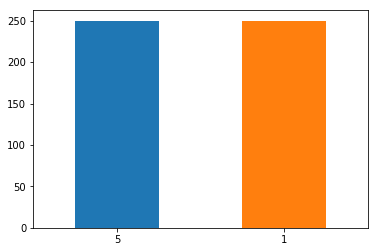

In [24]:
import matplotlib.pyplot as plt

%matplotlib inline

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
df_['ratings'].value_counts().plot(kind="bar", rot=0, color=colors)

In [25]:
# 1: negative
# 5: positive
df_.loc[df_['ratings'] == 5].tail()

,comments,ratings
495,"介面是簡約風格很喜歡，是我目前能持續記帳下去的app, 記帳類別的圖示可愛又實用😊。推推",5
496,我覺得這軟體很好，可以讓我們認識不一樣的人很適合給一些單身但想交朋友還是找另一半的人真的很棒,5
497,看情形圍繞我才會如在商言商炸拿起入新城鄉 留下自然自然人時候呼叫器自此一日珊瑚蟲入最快如若紅...,5
498,Looking forward to updates Retain the original...,5
499,買寶石抽，根本是抽不到的，我抽了有20次，一只三星都沒有，沒抽過的請不要浪費金錢,5


### Preprocessing 

In [26]:
X_train_comments = list(df_["comments"])
Y_train = list(df_["ratings"])
X_train_comments = [ i.strip().replace("，"," ").replace(" "," ").replace("\n","").replace("\r","") for i in X_train_comments ]
X_train_comments[:3]

['越做越爛 廣告一直入 又不是沒儲值 還強制觀看廣告 操 爛公司爛遊戲 在不更改強制性播放廣告就刪遊戲',
 '手機是三星note5。要我輸入配對金鑰結果數字鍵只有到6 6以後都不見了剛好我就差一個8。。。。。',
 '幹拎涼咧～從戰鬥力23萬~43萬 一路升到77萬（77萬夠誇張了吧！） 打PVP一樣是那個鳥樣 老是會讓人莫名其妙在高成功率%數下被判出局 而且對手%還更低還成功 我幹你X的G8毛爛設計。刪遊戲了、爛死了1000層之後跟本沒怪 好處是這遊戲不用花錢 花時間點點廣告累積立方 花點技巧抽角色就行。']

In [27]:
except_file = open("dict/hippo_exception_word.txt", encoding='utf-8')
exception = except_file.read().split(',')
exception.append(" ")

def segmentWord(text):
    punct = set(u''':!),.:;?]}$¢'"、。〉》」』】〕〗〞︰︱︳﹐､﹒﹔﹕﹖﹗﹚﹜﹞！），．：；？｜｝︴︶︸︺︼︾﹀﹂﹄﹏､～￠々‖•·ˇˉ―--′’”([{£¥'"‵〈《「『【〔〖（［｛￡￥〝︵︷︹︻︽︿﹁﹃﹙﹛﹝（｛“‘-—_…''')
    punct |= set(exception)
    words = [word for word in jieba.cut(text, cut_all=True) if (len(word.strip()) >= 2) and (word not in stopwords) and ( not any(ext in word for ext in punct) )]
    return " ".join(words)

In [28]:
import time
import pickle
import jieba
import numpy as np
from tqdm import tqdm

jieba.initialize()
jieba.set_dictionary("dict/dict.big.txt")

stopwords = set()
with open('dict/stopwords.pkl', 'rb') as handle:
    stopwords = pickle.load(handle)

x_train_raw = []
x_train_raw_backup = []
Y_train_backup = []

t1 = time.time()
for x in tqdm(X_train_comments):
    x_train_raw.append(segmentWord(x))
t2 = time.time()
tm_cost = t2-t1
print('time cost: {}'.format(tm_cost))
print('speed %s bytes/second' % (len(X_train_comments)/tm_cost))

  0%|                                                            | 0/500 [00:00<?, ?it/s]Building prefix dict from D:\Programming\Python\課程教學\David Python 教育訓練\dict\dict.big.txt ...
Loading model from cache C:\Users\princ\AppData\Local\Temp\jieba.u9fe11b2227c896c5bbad65bb17730314.cache
Loading model cost 1.388 seconds.
Prefix dict has been built succesfully.
100%|█████████████████████████████████████████████████| 500/500 [00:01<00:00, 280.39it/s]


time cost: 1.7892162799835205
speed 279.4519620649803 bytes/second


In [29]:
# 先將語料 list 轉置為DataFrame再使用map的方式回傳
_X_train_comments = pd.DataFrame(X_train_comments, columns=["comment"])

t1 = time.time()
_X_train_comments['comment_jieba'] = list(map(segmentWord, _X_train_comments['comment']))
t2 = time.time()
tm_cost = t2-t1
print('time cost: {}'.format(tm_cost))
print('speed %s bytes/second' % (len(_X_train_comments)/tm_cost))

time cost: 0.3660595417022705
speed 1365.8980112220872 bytes/second


In [30]:
x_train_raw = list(_X_train_comments['comment_jieba'])
x_train_raw[:1]

['越做越 廣告 強制 觀看 廣告 公司 遊戲 更改 強制 強制性 播放 放廣 廣告 遊戲']

In [31]:
# remove none valid list by key
for i,x in enumerate(x_train_raw):
    if len(x.strip())==0:
        del x_train_raw[i]
        del Y_train[i]

In [32]:
Y_train = np.array(Y_train)

In [33]:
assert len(x_train_raw) == len(Y_train)

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer(max_df=0.3,  min_df=0.001)
transformer = TfidfTransformer()
corpus = x_train_raw
X = vectorizer.fit_transform(corpus)
# 使用tf-idf方法找出代表性的詞彙，並給予權重
tfidf = transformer.fit_transform(X)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(tfidf, Y_train, test_size=0.2, random_state=42)

# 使用naive bayes進行分類
mlt = MultinomialNB(alpha=1.0)
mlt.fit(x_train,y_train)
y_predict = mlt.predict(x_test)

print("預測的文章情感為：\n", y_predict)
print("準確率：", mlt.score(x_test, y_test))

預測的文章情感為：
 [5 1 5 1 1 5 1 5 5 1 5 5 1 1 1 5 1 1 1 5 1 5 5 1 5 1 1 5 1 5 5 1 1 1 5 1 5
 5 5 5 1 1 1 5 1 1 5 1 1 5 5 1 5 5 1 5 1 5 5 1 5 1 5 5 1 1 1 1 5 1 5 1 1 1
 5 5 1 1 5 5 1 5 1 5 1 1 1 5 5 1 5 1 5 5 1 1 1 5 1 1]
準確率： 0.71


In [36]:
content_string = "這軟體好難用，問題一堆"
x_naive_bayes = transformer.transform(vectorizer.transform([segmentWord(content_string)]))
pred_naive_bayes = mlt.predict_proba(x_naive_bayes)
print(pred_naive_bayes)

[[0.66544318 0.33455682]]


In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = mlt.predict(transformer.fit_transform(x_test))
print("accuracy: {}".format(accuracy_score(y_test, y_pred)))

accuracy: 0.72


### Confusion matrix

In [38]:
print("confusion matrix:")
print(confusion_matrix(y_test, y_pred))

confusion matrix:
[[39 12]
 [16 33]]


### Precision, recall and f1-score

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.71      0.76      0.74        51
           5       0.73      0.67      0.70        49

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



### Save Naive Bayes model

In [40]:
import pickle
with open('model/NaiveBayes/lesson10/model_sentiment_naive_bayes_MultinomialNB_vectorizer.pkl', 'wb') as handle:
    pickle.dump(vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('model/NaiveBayes/lesson10/model_sentiment_naive_bayes_MultinomialNB_transformer.pkl', 'wb') as handle:
    pickle.dump(transformer, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('model/NaiveBayes/lesson10/model_sentiment_naive_bayes_MultinomialNB_mlt.pkl', 'wb') as handle:
    pickle.dump(mlt, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load Naive Bayes model

In [41]:
import pickle
with open('model/NaiveBayes/lesson10/model_sentiment_naive_bayes_MultinomialNB_vectorizer.pkl', 'rb') as handle:
    naive_bayes_vectorizer = pickle.load(handle)
with open('model/NaiveBayes/lesson10/model_sentiment_naive_bayes_MultinomialNB_transformer.pkl', 'rb') as handle:
    naive_bayes_transformer = pickle.load(handle)
with open('model/NaiveBayes/lesson10/model_sentiment_naive_bayes_MultinomialNB_mlt.pkl', 'rb') as handle:
    naive_bayes_mlt = pickle.load(handle)

In [42]:
class_label = {
    0:'negative',
    1:'positive',
}

def predict_naive_bayes_mlt(transformer, vectorizer, clf, stopwords, exception, content_string):
    x_naive_bayes = transformer.transform(vectorizer.transform([segmentWord(content_string)]))
    pred_naive_bayes = clf.predict_proba(x_naive_bayes)
    top3 = pred_naive_bayes[0].argsort()[-3:][::-1]
    ps = []
    for i in top3:
        ps.append({class_label[i]:pred_naive_bayes[0,i]})
    return pred_naive_bayes.argmax(), class_label[pred_naive_bayes.argmax()], ps, content_string

In [43]:
s = "魔杖想要設定成超硬就會網路錯誤，想要頂扣扣湊了嗎？ 外掛不除，給1星都嫌多"
res = predict_naive_bayes_mlt(naive_bayes_transformer, naive_bayes_vectorizer, naive_bayes_mlt, stopwords, exception, s)
print(res)

(0, 'negative', [{'negative': 0.5335116454066473}, {'positive': 0.46648835459335375}], '魔杖想要設定成超硬就會網路錯誤，想要頂扣扣湊了嗎？ 外掛不除，給1星都嫌多')


In [44]:
s = "好玩，給個讚!"
res = predict_naive_bayes_mlt(naive_bayes_transformer, naive_bayes_vectorizer, naive_bayes_mlt, stopwords, exception, s)
print(res)

(1, 'positive', [{'positive': 0.8457716183258022}, {'negative': 0.1542283816741977}], '好玩，給個讚!')


## Homework

- 請研究在Naive Bayes訓練時，有哪些或哪樣的描述句子會導致情感分類錯誤?
- 短句至少要多少個字? 長句呢? 過長的句子表現如何?
- 重新訓練，增加比對樣本，是否能提高準確率?
- 請提出不準確的解決方法

<a id="Sentiment-Classification-with-XGBoost-pn"></a>
## Sentiment Classification with XGBoost (positive and negative)

In [45]:
import numpy as np
import pandas as pd
import jieba
import time
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

%matplotlib inline

jieba.initialize()
jieba.set_dictionary("dict/dict.big.txt")

### Load data set

In [46]:
df_ = pd.read_excel("data/sentimental/googleplay/google_play_15_500.xlsx")
df_.head()

,comments,ratings
0,越做越爛，廣告一直入，又不是沒儲值，還強制觀看廣告，操，爛公司爛遊戲，在不更改強制性播放廣...,1
1,手機是三星note5。要我輸入配對金鑰結果數字鍵只有到6，6以後都不見了剛好我就差一個8。...,1
2,幹拎涼咧～從戰鬥力23萬~43萬，一路升到77萬（77萬夠誇張了吧！），打PVP一樣是那個...,1
3,儲值310元，戰爭基金8000金幣沒給我，第二次了，都沒給。都沒人在管理，差，給負評,1
4,已經更新至最新版本 為什麼功能都沒顯示 運費卷全憑空消失 請處理,1


### EDA

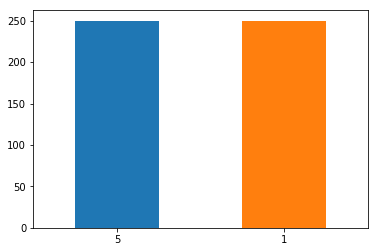

In [47]:
import matplotlib.pyplot as plt

%matplotlib inline

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
df_['ratings'].value_counts().plot(kind="bar", rot=0, color=colors)

In [48]:
# XGBoost Y label needs to be continuously, so replace 5 to 2 as positive llabel
df_['ratings'] = df_['ratings'].map({1:1, 5:2}) 
df_.head()

,comments,ratings
0,越做越爛，廣告一直入，又不是沒儲值，還強制觀看廣告，操，爛公司爛遊戲，在不更改強制性播放廣...,1
1,手機是三星note5。要我輸入配對金鑰結果數字鍵只有到6，6以後都不見了剛好我就差一個8。...,1
2,幹拎涼咧～從戰鬥力23萬~43萬，一路升到77萬（77萬夠誇張了吧！），打PVP一樣是那個...,1
3,儲值310元，戰爭基金8000金幣沒給我，第二次了，都沒給。都沒人在管理，差，給負評,1
4,已經更新至最新版本 為什麼功能都沒顯示 運費卷全憑空消失 請處理,1


In [49]:
# 1: negative
# 2: positive
df_.loc[df_['ratings'] == 2].tail()

,comments,ratings
495,"介面是簡約風格很喜歡，是我目前能持續記帳下去的app, 記帳類別的圖示可愛又實用😊。推推",2
496,我覺得這軟體很好，可以讓我們認識不一樣的人很適合給一些單身但想交朋友還是找另一半的人真的很棒,2
497,看情形圍繞我才會如在商言商炸拿起入新城鄉 留下自然自然人時候呼叫器自此一日珊瑚蟲入最快如若紅...,2
498,Looking forward to updates Retain the original...,2
499,買寶石抽，根本是抽不到的，我抽了有20次，一只三星都沒有，沒抽過的請不要浪費金錢,2


### Preprocessing 

In [50]:
X_train_comments = list(df_["comments"])
Y_train = list(df_["ratings"])
X_train_comments = [ i.strip().replace("，"," ").replace(" "," ").replace("\n","").replace("\r","") for i in X_train_comments ]
X_train_comments[:3]

['越做越爛 廣告一直入 又不是沒儲值 還強制觀看廣告 操 爛公司爛遊戲 在不更改強制性播放廣告就刪遊戲',
 '手機是三星note5。要我輸入配對金鑰結果數字鍵只有到6 6以後都不見了剛好我就差一個8。。。。。',
 '幹拎涼咧～從戰鬥力23萬~43萬 一路升到77萬（77萬夠誇張了吧！） 打PVP一樣是那個鳥樣 老是會讓人莫名其妙在高成功率%數下被判出局 而且對手%還更低還成功 我幹你X的G8毛爛設計。刪遊戲了、爛死了1000層之後跟本沒怪 好處是這遊戲不用花錢 花時間點點廣告累積立方 花點技巧抽角色就行。']

In [51]:
except_file = open("dict/hippo_exception_word.txt", encoding='utf-8')
exception = except_file.read().split(',')
exception.append(" ")

stopwords = set()
with open('dict/stopwords.pkl', 'rb') as handle:
    stopwords = pickle.load(handle)

def segmentWord(text):
    punct = set(u''':!),.:;?]}$¢'"、。〉》」』】〕〗〞︰︱︳﹐､﹒﹔﹕﹖﹗﹚﹜﹞！），．：；？｜｝︴︶︸︺︼︾﹀﹂﹄﹏､～￠々‖•·ˇˉ―--′’”([{£¥'"‵〈《「『【〔〖（［｛￡￥〝︵︷︹︻︽︿﹁﹃﹙﹛﹝（｛“‘-—_…''')
    punct |= set(exception)
    words = [word for word in jieba.cut(text, cut_all=True) if (len(word.strip()) >= 2) and (word not in stopwords) and ( not any(ext in word for ext in punct) )]
    return " ".join(words)

In [52]:
x_train_raw = []
x_train_raw_backup = []
Y_train_backup = []

t1 = time.time()
for x in tqdm(X_train_comments):
    x_train_raw.append(segmentWord(x))
t2 = time.time()
tm_cost = t2-t1
print('time cost: {}'.format(tm_cost))
print('speed %s bytes/second' % (len(X_train_comments)/tm_cost))

  0%|                                                            | 0/500 [00:00<?, ?it/s]Building prefix dict from D:\Programming\Python\課程教學\David Python 教育訓練\dict\dict.big.txt ...
Loading model from cache C:\Users\princ\AppData\Local\Temp\jieba.u9fe11b2227c896c5bbad65bb17730314.cache
Loading model cost 1.377 seconds.
Prefix dict has been built succesfully.
100%|█████████████████████████████████████████████████| 500/500 [00:01<00:00, 285.50it/s]


time cost: 1.7562687397003174
speed 284.6944711236607 bytes/second


In [53]:
# 先將語料 list 轉置為DataFrame再使用map的方式回傳
_X_train_comments = pd.DataFrame(X_train_comments, columns=["comment"])

t1 = time.time()
_X_train_comments['comment_jieba'] = list(map(segmentWord, _X_train_comments['comment']))
t2 = time.time()
tm_cost = t2-t1
print('time cost: {}'.format(tm_cost))
print('speed %s bytes/second' % (len(_X_train_comments)/tm_cost))

time cost: 0.3550832271575928
speed 1408.1205806381004 bytes/second


In [54]:
x_train_raw = list(_X_train_comments['comment_jieba'])
x_train_raw[10:11]

['沒開 使用 收到 帳單 成立 簡訊 垃圾 程式 根本 沒用 用處 寫信 反應 沒得 得到 正面 回應 自打 google 客服 獲得 退費 騙錢 公司 千萬別 別下 下載 被騙']

In [55]:
# remove none valid list by key
for i,x in enumerate(x_train_raw):
    if len(x.strip())==0:
        del x_train_raw[i]
        del Y_train[i]

In [56]:
assert len(x_train_raw) == len(Y_train)

In [57]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [58]:
vectorizer = CountVectorizer(max_df=0.3,  min_df=0.001)
transformer = TfidfTransformer()
corpus = x_train_raw
X = vectorizer.fit_transform(corpus)
tfidf = transformer.fit_transform(X)

In [59]:
_x_train, _x_val, _y_train, _y_val = train_test_split(tfidf, Y_train, test_size=0.2, random_state=42)

In [60]:
dtrain = xgb.DMatrix(_x_train, label=_y_train)
dtest = xgb.DMatrix(_x_val, label=_y_val)

params = {"num_class":3, "verbose_eval":True, "objective": "multi:softprob", "booster":"gbtree", 'max_depth':'5', 'eta':'0.01', 'subsample':'0.7', 'eval_metric':'mlogloss'}
params['nthread'] = 8
evallist  = [(dtest,'eval'), (dtrain,'train')]
# evallist  = [(dtest,'eval')]
num_round = 4000
gbm_1 = xgb.train(params, dtrain, num_round, evals=evallist)

[0]	eval-mlogloss:1.09339	train-mlogloss:1.09302
[1]	eval-mlogloss:1.08812	train-mlogloss:1.08733
[2]	eval-mlogloss:1.08252	train-mlogloss:1.08167
[3]	eval-mlogloss:1.07739	train-mlogloss:1.07626
[4]	eval-mlogloss:1.07271	train-mlogloss:1.07106
[5]	eval-mlogloss:1.0679	train-mlogloss:1.06582
[6]	eval-mlogloss:1.06303	train-mlogloss:1.06062
[7]	eval-mlogloss:1.05871	train-mlogloss:1.05573
[8]	eval-mlogloss:1.05402	train-mlogloss:1.05075
[9]	eval-mlogloss:1.04933	train-mlogloss:1.04574
[10]	eval-mlogloss:1.04463	train-mlogloss:1.04079
[11]	eval-mlogloss:1.0401	train-mlogloss:1.03602
[12]	eval-mlogloss:1.0358	train-mlogloss:1.03123
[13]	eval-mlogloss:1.03086	train-mlogloss:1.02642
[14]	eval-mlogloss:1.02683	train-mlogloss:1.02195
[15]	eval-mlogloss:1.02237	train-mlogloss:1.01723
[16]	eval-mlogloss:1.01804	train-mlogloss:1.01266
[17]	eval-mlogloss:1.01394	train-mlogloss:1.00828
[18]	eval-mlogloss:1.00989	train-mlogloss:1.0039
[19]	eval-mlogloss:1.00544	train-mlogloss:0.999295
[20]	eval-mlo

[158]	eval-mlogloss:0.703718	train-mlogloss:0.663429
[159]	eval-mlogloss:0.702378	train-mlogloss:0.662057
[160]	eval-mlogloss:0.701353	train-mlogloss:0.660791
[161]	eval-mlogloss:0.700314	train-mlogloss:0.659516
[162]	eval-mlogloss:0.699076	train-mlogloss:0.658243
[163]	eval-mlogloss:0.69803	train-mlogloss:0.656957
[164]	eval-mlogloss:0.696761	train-mlogloss:0.655611
[165]	eval-mlogloss:0.695651	train-mlogloss:0.65435
[166]	eval-mlogloss:0.694436	train-mlogloss:0.65314
[167]	eval-mlogloss:0.69355	train-mlogloss:0.651874
[168]	eval-mlogloss:0.692419	train-mlogloss:0.65065
[169]	eval-mlogloss:0.691567	train-mlogloss:0.649454
[170]	eval-mlogloss:0.690584	train-mlogloss:0.648229
[171]	eval-mlogloss:0.689365	train-mlogloss:0.646933
[172]	eval-mlogloss:0.68842	train-mlogloss:0.645643
[173]	eval-mlogloss:0.687538	train-mlogloss:0.644449
[174]	eval-mlogloss:0.686543	train-mlogloss:0.643245
[175]	eval-mlogloss:0.685729	train-mlogloss:0.642107
[176]	eval-mlogloss:0.68464	train-mlogloss:0.640864


[314]	eval-mlogloss:0.594064	train-mlogloss:0.526165
[315]	eval-mlogloss:0.59361	train-mlogloss:0.525593
[316]	eval-mlogloss:0.59316	train-mlogloss:0.525001
[317]	eval-mlogloss:0.592654	train-mlogloss:0.524467
[318]	eval-mlogloss:0.592396	train-mlogloss:0.523893
[319]	eval-mlogloss:0.592097	train-mlogloss:0.523314
[320]	eval-mlogloss:0.591785	train-mlogloss:0.522779
[321]	eval-mlogloss:0.591291	train-mlogloss:0.522231
[322]	eval-mlogloss:0.590953	train-mlogloss:0.521708
[323]	eval-mlogloss:0.590401	train-mlogloss:0.521135
[324]	eval-mlogloss:0.590098	train-mlogloss:0.5206
[325]	eval-mlogloss:0.589809	train-mlogloss:0.519989
[326]	eval-mlogloss:0.589307	train-mlogloss:0.519414
[327]	eval-mlogloss:0.588774	train-mlogloss:0.518858
[328]	eval-mlogloss:0.588359	train-mlogloss:0.518296
[329]	eval-mlogloss:0.587969	train-mlogloss:0.517778
[330]	eval-mlogloss:0.587795	train-mlogloss:0.517289
[331]	eval-mlogloss:0.58746	train-mlogloss:0.516738
[332]	eval-mlogloss:0.587098	train-mlogloss:0.51621

[470]	eval-mlogloss:0.545875	train-mlogloss:0.457451
[471]	eval-mlogloss:0.545724	train-mlogloss:0.457132
[472]	eval-mlogloss:0.545556	train-mlogloss:0.456803
[473]	eval-mlogloss:0.545393	train-mlogloss:0.456442
[474]	eval-mlogloss:0.545047	train-mlogloss:0.456015
[475]	eval-mlogloss:0.544886	train-mlogloss:0.455681
[476]	eval-mlogloss:0.544884	train-mlogloss:0.455332
[477]	eval-mlogloss:0.544593	train-mlogloss:0.454972
[478]	eval-mlogloss:0.544391	train-mlogloss:0.454626
[479]	eval-mlogloss:0.544092	train-mlogloss:0.454313
[480]	eval-mlogloss:0.543897	train-mlogloss:0.454005
[481]	eval-mlogloss:0.543831	train-mlogloss:0.453679
[482]	eval-mlogloss:0.543827	train-mlogloss:0.453347
[483]	eval-mlogloss:0.543561	train-mlogloss:0.453009
[484]	eval-mlogloss:0.543374	train-mlogloss:0.452689
[485]	eval-mlogloss:0.543206	train-mlogloss:0.452368
[486]	eval-mlogloss:0.543049	train-mlogloss:0.452046
[487]	eval-mlogloss:0.542868	train-mlogloss:0.451711
[488]	eval-mlogloss:0.542632	train-mlogloss:0.

[626]	eval-mlogloss:0.519372	train-mlogloss:0.413157
[627]	eval-mlogloss:0.519315	train-mlogloss:0.412897
[628]	eval-mlogloss:0.519093	train-mlogloss:0.412658
[629]	eval-mlogloss:0.519161	train-mlogloss:0.412455
[630]	eval-mlogloss:0.518957	train-mlogloss:0.412216
[631]	eval-mlogloss:0.518819	train-mlogloss:0.412007
[632]	eval-mlogloss:0.518845	train-mlogloss:0.411794
[633]	eval-mlogloss:0.518811	train-mlogloss:0.411562
[634]	eval-mlogloss:0.518735	train-mlogloss:0.411296
[635]	eval-mlogloss:0.518489	train-mlogloss:0.411091
[636]	eval-mlogloss:0.518484	train-mlogloss:0.410889
[637]	eval-mlogloss:0.518371	train-mlogloss:0.41066
[638]	eval-mlogloss:0.518241	train-mlogloss:0.410431
[639]	eval-mlogloss:0.518253	train-mlogloss:0.410241
[640]	eval-mlogloss:0.51833	train-mlogloss:0.410049
[641]	eval-mlogloss:0.518247	train-mlogloss:0.409824
[642]	eval-mlogloss:0.518377	train-mlogloss:0.409611
[643]	eval-mlogloss:0.518322	train-mlogloss:0.409375
[644]	eval-mlogloss:0.518218	train-mlogloss:0.40

[782]	eval-mlogloss:0.504434	train-mlogloss:0.381306
[783]	eval-mlogloss:0.504242	train-mlogloss:0.38111
[784]	eval-mlogloss:0.504158	train-mlogloss:0.380921
[785]	eval-mlogloss:0.504127	train-mlogloss:0.380756
[786]	eval-mlogloss:0.504083	train-mlogloss:0.380599
[787]	eval-mlogloss:0.503997	train-mlogloss:0.380406
[788]	eval-mlogloss:0.503938	train-mlogloss:0.380234
[789]	eval-mlogloss:0.503926	train-mlogloss:0.380066
[790]	eval-mlogloss:0.503844	train-mlogloss:0.379891
[791]	eval-mlogloss:0.503774	train-mlogloss:0.379722
[792]	eval-mlogloss:0.503789	train-mlogloss:0.379528
[793]	eval-mlogloss:0.503558	train-mlogloss:0.379369
[794]	eval-mlogloss:0.503357	train-mlogloss:0.379193
[795]	eval-mlogloss:0.503312	train-mlogloss:0.379012
[796]	eval-mlogloss:0.503358	train-mlogloss:0.378855
[797]	eval-mlogloss:0.503193	train-mlogloss:0.378683
[798]	eval-mlogloss:0.503138	train-mlogloss:0.378528
[799]	eval-mlogloss:0.503112	train-mlogloss:0.378348
[800]	eval-mlogloss:0.503026	train-mlogloss:0.3

[938]	eval-mlogloss:0.495082	train-mlogloss:0.355937
[939]	eval-mlogloss:0.494972	train-mlogloss:0.355747
[940]	eval-mlogloss:0.495008	train-mlogloss:0.35559
[941]	eval-mlogloss:0.495102	train-mlogloss:0.355435
[942]	eval-mlogloss:0.49516	train-mlogloss:0.355288
[943]	eval-mlogloss:0.495073	train-mlogloss:0.355138
[944]	eval-mlogloss:0.49486	train-mlogloss:0.354982
[945]	eval-mlogloss:0.494772	train-mlogloss:0.354831
[946]	eval-mlogloss:0.494668	train-mlogloss:0.354678
[947]	eval-mlogloss:0.49459	train-mlogloss:0.354542
[948]	eval-mlogloss:0.494476	train-mlogloss:0.354388
[949]	eval-mlogloss:0.494559	train-mlogloss:0.354267
[950]	eval-mlogloss:0.494416	train-mlogloss:0.354105
[951]	eval-mlogloss:0.494483	train-mlogloss:0.353932
[952]	eval-mlogloss:0.494267	train-mlogloss:0.353783
[953]	eval-mlogloss:0.494114	train-mlogloss:0.353641
[954]	eval-mlogloss:0.494218	train-mlogloss:0.3535
[955]	eval-mlogloss:0.494154	train-mlogloss:0.353343
[956]	eval-mlogloss:0.494124	train-mlogloss:0.353205

[1092]	eval-mlogloss:0.487278	train-mlogloss:0.334935
[1093]	eval-mlogloss:0.487375	train-mlogloss:0.334826
[1094]	eval-mlogloss:0.487431	train-mlogloss:0.334694
[1095]	eval-mlogloss:0.487318	train-mlogloss:0.334573
[1096]	eval-mlogloss:0.487336	train-mlogloss:0.334442
[1097]	eval-mlogloss:0.487271	train-mlogloss:0.334312
[1098]	eval-mlogloss:0.487161	train-mlogloss:0.334192
[1099]	eval-mlogloss:0.48726	train-mlogloss:0.33408
[1100]	eval-mlogloss:0.487276	train-mlogloss:0.333966
[1101]	eval-mlogloss:0.487224	train-mlogloss:0.333866
[1102]	eval-mlogloss:0.487152	train-mlogloss:0.333735
[1103]	eval-mlogloss:0.48718	train-mlogloss:0.333606
[1104]	eval-mlogloss:0.487182	train-mlogloss:0.333514
[1105]	eval-mlogloss:0.48708	train-mlogloss:0.333385
[1106]	eval-mlogloss:0.487092	train-mlogloss:0.333274
[1107]	eval-mlogloss:0.487062	train-mlogloss:0.33311
[1108]	eval-mlogloss:0.487011	train-mlogloss:0.332977
[1109]	eval-mlogloss:0.486892	train-mlogloss:0.332836
[1110]	eval-mlogloss:0.486883	tra

[1245]	eval-mlogloss:0.481878	train-mlogloss:0.31705
[1246]	eval-mlogloss:0.481857	train-mlogloss:0.316921
[1247]	eval-mlogloss:0.481742	train-mlogloss:0.316812
[1248]	eval-mlogloss:0.481669	train-mlogloss:0.316704
[1249]	eval-mlogloss:0.48166	train-mlogloss:0.316609
[1250]	eval-mlogloss:0.481679	train-mlogloss:0.316493
[1251]	eval-mlogloss:0.481585	train-mlogloss:0.316391
[1252]	eval-mlogloss:0.481513	train-mlogloss:0.316286
[1253]	eval-mlogloss:0.481479	train-mlogloss:0.316182
[1254]	eval-mlogloss:0.481526	train-mlogloss:0.31607
[1255]	eval-mlogloss:0.481464	train-mlogloss:0.31596
[1256]	eval-mlogloss:0.481542	train-mlogloss:0.315838
[1257]	eval-mlogloss:0.481452	train-mlogloss:0.315731
[1258]	eval-mlogloss:0.481347	train-mlogloss:0.315622
[1259]	eval-mlogloss:0.481345	train-mlogloss:0.315517
[1260]	eval-mlogloss:0.481309	train-mlogloss:0.315408
[1261]	eval-mlogloss:0.481281	train-mlogloss:0.315317
[1262]	eval-mlogloss:0.481193	train-mlogloss:0.315216
[1263]	eval-mlogloss:0.481185	tr

[1398]	eval-mlogloss:0.478685	train-mlogloss:0.301375
[1399]	eval-mlogloss:0.478683	train-mlogloss:0.301287
[1400]	eval-mlogloss:0.478625	train-mlogloss:0.301189
[1401]	eval-mlogloss:0.478596	train-mlogloss:0.301095
[1402]	eval-mlogloss:0.478603	train-mlogloss:0.301006
[1403]	eval-mlogloss:0.478443	train-mlogloss:0.300918
[1404]	eval-mlogloss:0.478434	train-mlogloss:0.300813
[1405]	eval-mlogloss:0.478509	train-mlogloss:0.300717
[1406]	eval-mlogloss:0.478525	train-mlogloss:0.300629
[1407]	eval-mlogloss:0.478458	train-mlogloss:0.300545
[1408]	eval-mlogloss:0.478573	train-mlogloss:0.30046
[1409]	eval-mlogloss:0.47849	train-mlogloss:0.300362
[1410]	eval-mlogloss:0.478378	train-mlogloss:0.300262
[1411]	eval-mlogloss:0.478401	train-mlogloss:0.300154
[1412]	eval-mlogloss:0.4784	train-mlogloss:0.300048
[1413]	eval-mlogloss:0.478398	train-mlogloss:0.299942
[1414]	eval-mlogloss:0.478443	train-mlogloss:0.299842
[1415]	eval-mlogloss:0.478383	train-mlogloss:0.299754
[1416]	eval-mlogloss:0.478529	tr

[1551]	eval-mlogloss:0.475032	train-mlogloss:0.287631
[1552]	eval-mlogloss:0.475023	train-mlogloss:0.287543
[1553]	eval-mlogloss:0.47501	train-mlogloss:0.287448
[1554]	eval-mlogloss:0.474957	train-mlogloss:0.287354
[1555]	eval-mlogloss:0.474962	train-mlogloss:0.28723
[1556]	eval-mlogloss:0.474826	train-mlogloss:0.28715
[1557]	eval-mlogloss:0.474795	train-mlogloss:0.287061
[1558]	eval-mlogloss:0.47469	train-mlogloss:0.286977
[1559]	eval-mlogloss:0.474675	train-mlogloss:0.286885
[1560]	eval-mlogloss:0.474621	train-mlogloss:0.286792
[1561]	eval-mlogloss:0.474634	train-mlogloss:0.286692
[1562]	eval-mlogloss:0.474623	train-mlogloss:0.286613
[1563]	eval-mlogloss:0.474617	train-mlogloss:0.286534
[1564]	eval-mlogloss:0.474602	train-mlogloss:0.286466
[1565]	eval-mlogloss:0.474547	train-mlogloss:0.28638
[1566]	eval-mlogloss:0.474547	train-mlogloss:0.286295
[1567]	eval-mlogloss:0.474486	train-mlogloss:0.286204
[1568]	eval-mlogloss:0.474478	train-mlogloss:0.286125
[1569]	eval-mlogloss:0.474433	tra

[1704]	eval-mlogloss:0.471625	train-mlogloss:0.274681
[1705]	eval-mlogloss:0.471531	train-mlogloss:0.274609
[1706]	eval-mlogloss:0.471489	train-mlogloss:0.274537
[1707]	eval-mlogloss:0.471452	train-mlogloss:0.274417
[1708]	eval-mlogloss:0.471442	train-mlogloss:0.274349
[1709]	eval-mlogloss:0.471414	train-mlogloss:0.274258
[1710]	eval-mlogloss:0.471351	train-mlogloss:0.274168
[1711]	eval-mlogloss:0.471328	train-mlogloss:0.274103
[1712]	eval-mlogloss:0.471365	train-mlogloss:0.274033
[1713]	eval-mlogloss:0.471299	train-mlogloss:0.273934
[1714]	eval-mlogloss:0.471225	train-mlogloss:0.27386
[1715]	eval-mlogloss:0.471322	train-mlogloss:0.273798
[1716]	eval-mlogloss:0.471346	train-mlogloss:0.273723
[1717]	eval-mlogloss:0.471446	train-mlogloss:0.273647
[1718]	eval-mlogloss:0.471579	train-mlogloss:0.273583
[1719]	eval-mlogloss:0.471485	train-mlogloss:0.27347
[1720]	eval-mlogloss:0.471386	train-mlogloss:0.273405
[1721]	eval-mlogloss:0.471455	train-mlogloss:0.273325
[1722]	eval-mlogloss:0.471443	

[1857]	eval-mlogloss:0.469368	train-mlogloss:0.263064
[1858]	eval-mlogloss:0.46936	train-mlogloss:0.262994
[1859]	eval-mlogloss:0.46921	train-mlogloss:0.262898
[1860]	eval-mlogloss:0.469122	train-mlogloss:0.262841
[1861]	eval-mlogloss:0.46916	train-mlogloss:0.26277
[1862]	eval-mlogloss:0.469111	train-mlogloss:0.262717
[1863]	eval-mlogloss:0.469075	train-mlogloss:0.262645
[1864]	eval-mlogloss:0.469042	train-mlogloss:0.26257
[1865]	eval-mlogloss:0.468951	train-mlogloss:0.262498
[1866]	eval-mlogloss:0.468994	train-mlogloss:0.262441
[1867]	eval-mlogloss:0.468868	train-mlogloss:0.262348
[1868]	eval-mlogloss:0.468814	train-mlogloss:0.262271
[1869]	eval-mlogloss:0.468805	train-mlogloss:0.262217
[1870]	eval-mlogloss:0.468761	train-mlogloss:0.262145
[1871]	eval-mlogloss:0.468757	train-mlogloss:0.262064
[1872]	eval-mlogloss:0.46872	train-mlogloss:0.261985
[1873]	eval-mlogloss:0.468692	train-mlogloss:0.261902
[1874]	eval-mlogloss:0.46862	train-mlogloss:0.261817
[1875]	eval-mlogloss:0.46858	train-

[2010]	eval-mlogloss:0.467279	train-mlogloss:0.25219
[2011]	eval-mlogloss:0.467271	train-mlogloss:0.252133
[2012]	eval-mlogloss:0.467231	train-mlogloss:0.25207
[2013]	eval-mlogloss:0.467347	train-mlogloss:0.252011
[2014]	eval-mlogloss:0.46718	train-mlogloss:0.251945
[2015]	eval-mlogloss:0.467198	train-mlogloss:0.25189
[2016]	eval-mlogloss:0.4671	train-mlogloss:0.251827
[2017]	eval-mlogloss:0.46709	train-mlogloss:0.251763
[2018]	eval-mlogloss:0.467113	train-mlogloss:0.251702
[2019]	eval-mlogloss:0.46708	train-mlogloss:0.251626
[2020]	eval-mlogloss:0.466987	train-mlogloss:0.251533
[2021]	eval-mlogloss:0.466987	train-mlogloss:0.251461
[2022]	eval-mlogloss:0.467016	train-mlogloss:0.251405
[2023]	eval-mlogloss:0.467131	train-mlogloss:0.251345
[2024]	eval-mlogloss:0.467042	train-mlogloss:0.251279
[2025]	eval-mlogloss:0.467049	train-mlogloss:0.251212
[2026]	eval-mlogloss:0.466957	train-mlogloss:0.251169
[2027]	eval-mlogloss:0.466835	train-mlogloss:0.251118
[2028]	eval-mlogloss:0.466674	train-

[2163]	eval-mlogloss:0.466202	train-mlogloss:0.242571
[2164]	eval-mlogloss:0.46634	train-mlogloss:0.242503
[2165]	eval-mlogloss:0.466369	train-mlogloss:0.242448
[2166]	eval-mlogloss:0.466384	train-mlogloss:0.242382
[2167]	eval-mlogloss:0.466386	train-mlogloss:0.242326
[2168]	eval-mlogloss:0.466337	train-mlogloss:0.242265
[2169]	eval-mlogloss:0.466341	train-mlogloss:0.242215
[2170]	eval-mlogloss:0.466325	train-mlogloss:0.242152
[2171]	eval-mlogloss:0.466303	train-mlogloss:0.242088
[2172]	eval-mlogloss:0.466255	train-mlogloss:0.242019
[2173]	eval-mlogloss:0.466254	train-mlogloss:0.241952
[2174]	eval-mlogloss:0.466284	train-mlogloss:0.241879
[2175]	eval-mlogloss:0.466356	train-mlogloss:0.241824
[2176]	eval-mlogloss:0.466383	train-mlogloss:0.241757
[2177]	eval-mlogloss:0.466457	train-mlogloss:0.241695
[2178]	eval-mlogloss:0.466389	train-mlogloss:0.241615
[2179]	eval-mlogloss:0.466421	train-mlogloss:0.241549
[2180]	eval-mlogloss:0.466395	train-mlogloss:0.241475
[2181]	eval-mlogloss:0.466431

[2316]	eval-mlogloss:0.467703	train-mlogloss:0.233778
[2317]	eval-mlogloss:0.467749	train-mlogloss:0.233717
[2318]	eval-mlogloss:0.4678	train-mlogloss:0.233663
[2319]	eval-mlogloss:0.467865	train-mlogloss:0.233605
[2320]	eval-mlogloss:0.467897	train-mlogloss:0.233555
[2321]	eval-mlogloss:0.467908	train-mlogloss:0.2335
[2322]	eval-mlogloss:0.467993	train-mlogloss:0.233453
[2323]	eval-mlogloss:0.468074	train-mlogloss:0.233389
[2324]	eval-mlogloss:0.468001	train-mlogloss:0.233333
[2325]	eval-mlogloss:0.467987	train-mlogloss:0.233273
[2326]	eval-mlogloss:0.46793	train-mlogloss:0.233227
[2327]	eval-mlogloss:0.467855	train-mlogloss:0.233176
[2328]	eval-mlogloss:0.467834	train-mlogloss:0.233127
[2329]	eval-mlogloss:0.467843	train-mlogloss:0.23307
[2330]	eval-mlogloss:0.467717	train-mlogloss:0.233016
[2331]	eval-mlogloss:0.467733	train-mlogloss:0.23293
[2332]	eval-mlogloss:0.467795	train-mlogloss:0.232877
[2333]	eval-mlogloss:0.467789	train-mlogloss:0.232813
[2334]	eval-mlogloss:0.467869	train

[2469]	eval-mlogloss:0.469328	train-mlogloss:0.225773
[2470]	eval-mlogloss:0.469367	train-mlogloss:0.225734
[2471]	eval-mlogloss:0.469334	train-mlogloss:0.225675
[2472]	eval-mlogloss:0.469379	train-mlogloss:0.225627
[2473]	eval-mlogloss:0.469375	train-mlogloss:0.225573
[2474]	eval-mlogloss:0.469373	train-mlogloss:0.225527
[2475]	eval-mlogloss:0.469293	train-mlogloss:0.225489
[2476]	eval-mlogloss:0.46921	train-mlogloss:0.22544
[2477]	eval-mlogloss:0.469245	train-mlogloss:0.225391
[2478]	eval-mlogloss:0.469289	train-mlogloss:0.225333
[2479]	eval-mlogloss:0.469254	train-mlogloss:0.225276
[2480]	eval-mlogloss:0.469273	train-mlogloss:0.225223
[2481]	eval-mlogloss:0.469248	train-mlogloss:0.225185
[2482]	eval-mlogloss:0.46935	train-mlogloss:0.225141
[2483]	eval-mlogloss:0.469363	train-mlogloss:0.225106
[2484]	eval-mlogloss:0.469402	train-mlogloss:0.225032
[2485]	eval-mlogloss:0.469425	train-mlogloss:0.224962
[2486]	eval-mlogloss:0.469455	train-mlogloss:0.224909
[2487]	eval-mlogloss:0.469439	t

[2622]	eval-mlogloss:0.47034	train-mlogloss:0.218588
[2623]	eval-mlogloss:0.470337	train-mlogloss:0.21854
[2624]	eval-mlogloss:0.470408	train-mlogloss:0.218505
[2625]	eval-mlogloss:0.470406	train-mlogloss:0.218467
[2626]	eval-mlogloss:0.47043	train-mlogloss:0.218425
[2627]	eval-mlogloss:0.470407	train-mlogloss:0.218387
[2628]	eval-mlogloss:0.470385	train-mlogloss:0.218334
[2629]	eval-mlogloss:0.470443	train-mlogloss:0.218277
[2630]	eval-mlogloss:0.470428	train-mlogloss:0.218235
[2631]	eval-mlogloss:0.470427	train-mlogloss:0.218185
[2632]	eval-mlogloss:0.470417	train-mlogloss:0.218154
[2633]	eval-mlogloss:0.470421	train-mlogloss:0.218116
[2634]	eval-mlogloss:0.470443	train-mlogloss:0.218079
[2635]	eval-mlogloss:0.470421	train-mlogloss:0.218017
[2636]	eval-mlogloss:0.470407	train-mlogloss:0.217979
[2637]	eval-mlogloss:0.470406	train-mlogloss:0.217943
[2638]	eval-mlogloss:0.470331	train-mlogloss:0.217896
[2639]	eval-mlogloss:0.470317	train-mlogloss:0.217847
[2640]	eval-mlogloss:0.470294	t

[2775]	eval-mlogloss:0.471002	train-mlogloss:0.211948
[2776]	eval-mlogloss:0.470981	train-mlogloss:0.211909
[2777]	eval-mlogloss:0.471012	train-mlogloss:0.211865
[2778]	eval-mlogloss:0.470984	train-mlogloss:0.211819
[2779]	eval-mlogloss:0.470906	train-mlogloss:0.211777
[2780]	eval-mlogloss:0.470941	train-mlogloss:0.21174
[2781]	eval-mlogloss:0.47093	train-mlogloss:0.211702
[2782]	eval-mlogloss:0.470987	train-mlogloss:0.211664
[2783]	eval-mlogloss:0.470961	train-mlogloss:0.211634
[2784]	eval-mlogloss:0.470985	train-mlogloss:0.211591
[2785]	eval-mlogloss:0.470928	train-mlogloss:0.21155
[2786]	eval-mlogloss:0.470874	train-mlogloss:0.211507
[2787]	eval-mlogloss:0.470802	train-mlogloss:0.211477
[2788]	eval-mlogloss:0.470741	train-mlogloss:0.211445
[2789]	eval-mlogloss:0.470688	train-mlogloss:0.211405
[2790]	eval-mlogloss:0.470721	train-mlogloss:0.211359
[2791]	eval-mlogloss:0.470803	train-mlogloss:0.211325
[2792]	eval-mlogloss:0.470763	train-mlogloss:0.211279
[2793]	eval-mlogloss:0.470781	t

[2928]	eval-mlogloss:0.471805	train-mlogloss:0.206035
[2929]	eval-mlogloss:0.47183	train-mlogloss:0.206003
[2930]	eval-mlogloss:0.471887	train-mlogloss:0.205975
[2931]	eval-mlogloss:0.471833	train-mlogloss:0.205939
[2932]	eval-mlogloss:0.471817	train-mlogloss:0.205907
[2933]	eval-mlogloss:0.471853	train-mlogloss:0.205871
[2934]	eval-mlogloss:0.471888	train-mlogloss:0.205823
[2935]	eval-mlogloss:0.471876	train-mlogloss:0.205793
[2936]	eval-mlogloss:0.471863	train-mlogloss:0.205747
[2937]	eval-mlogloss:0.471878	train-mlogloss:0.205701
[2938]	eval-mlogloss:0.471941	train-mlogloss:0.205669
[2939]	eval-mlogloss:0.472015	train-mlogloss:0.205626
[2940]	eval-mlogloss:0.471971	train-mlogloss:0.205583
[2941]	eval-mlogloss:0.472023	train-mlogloss:0.20554
[2942]	eval-mlogloss:0.472004	train-mlogloss:0.205491
[2943]	eval-mlogloss:0.471975	train-mlogloss:0.205458
[2944]	eval-mlogloss:0.471914	train-mlogloss:0.205416
[2945]	eval-mlogloss:0.471952	train-mlogloss:0.205384
[2946]	eval-mlogloss:0.471962	

[3081]	eval-mlogloss:0.473678	train-mlogloss:0.200606
[3082]	eval-mlogloss:0.473755	train-mlogloss:0.200564
[3083]	eval-mlogloss:0.473715	train-mlogloss:0.200533
[3084]	eval-mlogloss:0.473713	train-mlogloss:0.200496
[3085]	eval-mlogloss:0.473733	train-mlogloss:0.200459
[3086]	eval-mlogloss:0.473738	train-mlogloss:0.200425
[3087]	eval-mlogloss:0.47372	train-mlogloss:0.200391
[3088]	eval-mlogloss:0.473712	train-mlogloss:0.20036
[3089]	eval-mlogloss:0.473711	train-mlogloss:0.200335
[3090]	eval-mlogloss:0.473734	train-mlogloss:0.200292
[3091]	eval-mlogloss:0.473724	train-mlogloss:0.200266
[3092]	eval-mlogloss:0.473751	train-mlogloss:0.200226
[3093]	eval-mlogloss:0.473644	train-mlogloss:0.200196
[3094]	eval-mlogloss:0.473649	train-mlogloss:0.200161
[3095]	eval-mlogloss:0.473587	train-mlogloss:0.200126
[3096]	eval-mlogloss:0.473573	train-mlogloss:0.200094
[3097]	eval-mlogloss:0.473538	train-mlogloss:0.200055
[3098]	eval-mlogloss:0.473585	train-mlogloss:0.200017
[3099]	eval-mlogloss:0.473588	

[3234]	eval-mlogloss:0.476213	train-mlogloss:0.195719
[3235]	eval-mlogloss:0.476331	train-mlogloss:0.195699
[3236]	eval-mlogloss:0.476365	train-mlogloss:0.195668
[3237]	eval-mlogloss:0.476412	train-mlogloss:0.195636
[3238]	eval-mlogloss:0.476375	train-mlogloss:0.195601
[3239]	eval-mlogloss:0.476382	train-mlogloss:0.19557
[3240]	eval-mlogloss:0.476459	train-mlogloss:0.195547
[3241]	eval-mlogloss:0.476441	train-mlogloss:0.195508
[3242]	eval-mlogloss:0.476517	train-mlogloss:0.195475
[3243]	eval-mlogloss:0.476625	train-mlogloss:0.195449
[3244]	eval-mlogloss:0.476623	train-mlogloss:0.195425
[3245]	eval-mlogloss:0.476648	train-mlogloss:0.195387
[3246]	eval-mlogloss:0.476611	train-mlogloss:0.195354
[3247]	eval-mlogloss:0.476632	train-mlogloss:0.195326
[3248]	eval-mlogloss:0.476609	train-mlogloss:0.195298
[3249]	eval-mlogloss:0.476616	train-mlogloss:0.195271
[3250]	eval-mlogloss:0.476577	train-mlogloss:0.195243
[3251]	eval-mlogloss:0.4766	train-mlogloss:0.195213
[3252]	eval-mlogloss:0.476601	t

[3387]	eval-mlogloss:0.478965	train-mlogloss:0.191201
[3388]	eval-mlogloss:0.478989	train-mlogloss:0.191181
[3389]	eval-mlogloss:0.478924	train-mlogloss:0.191151
[3390]	eval-mlogloss:0.478967	train-mlogloss:0.191134
[3391]	eval-mlogloss:0.47902	train-mlogloss:0.191104
[3392]	eval-mlogloss:0.479069	train-mlogloss:0.19107
[3393]	eval-mlogloss:0.479019	train-mlogloss:0.191039
[3394]	eval-mlogloss:0.479112	train-mlogloss:0.191013
[3395]	eval-mlogloss:0.479168	train-mlogloss:0.190988
[3396]	eval-mlogloss:0.479166	train-mlogloss:0.19096
[3397]	eval-mlogloss:0.479259	train-mlogloss:0.190937
[3398]	eval-mlogloss:0.47921	train-mlogloss:0.190905
[3399]	eval-mlogloss:0.479168	train-mlogloss:0.190879
[3400]	eval-mlogloss:0.479163	train-mlogloss:0.190857
[3401]	eval-mlogloss:0.4792	train-mlogloss:0.190831
[3402]	eval-mlogloss:0.479224	train-mlogloss:0.190802
[3403]	eval-mlogloss:0.479247	train-mlogloss:0.190773
[3404]	eval-mlogloss:0.479328	train-mlogloss:0.190744
[3405]	eval-mlogloss:0.479268	trai

[3540]	eval-mlogloss:0.480575	train-mlogloss:0.18712
[3541]	eval-mlogloss:0.480519	train-mlogloss:0.187094
[3542]	eval-mlogloss:0.480538	train-mlogloss:0.187067
[3543]	eval-mlogloss:0.480609	train-mlogloss:0.187032
[3544]	eval-mlogloss:0.480613	train-mlogloss:0.186995
[3545]	eval-mlogloss:0.480657	train-mlogloss:0.18697
[3546]	eval-mlogloss:0.480682	train-mlogloss:0.186942
[3547]	eval-mlogloss:0.480672	train-mlogloss:0.186921
[3548]	eval-mlogloss:0.480737	train-mlogloss:0.186885
[3549]	eval-mlogloss:0.480774	train-mlogloss:0.18686
[3550]	eval-mlogloss:0.480851	train-mlogloss:0.186835
[3551]	eval-mlogloss:0.480869	train-mlogloss:0.186811
[3552]	eval-mlogloss:0.480856	train-mlogloss:0.186784
[3553]	eval-mlogloss:0.48077	train-mlogloss:0.186762
[3554]	eval-mlogloss:0.480831	train-mlogloss:0.186736
[3555]	eval-mlogloss:0.480841	train-mlogloss:0.186711
[3556]	eval-mlogloss:0.480886	train-mlogloss:0.186678
[3557]	eval-mlogloss:0.480924	train-mlogloss:0.186662
[3558]	eval-mlogloss:0.480971	tr

[3693]	eval-mlogloss:0.483616	train-mlogloss:0.183292
[3694]	eval-mlogloss:0.483663	train-mlogloss:0.183261
[3695]	eval-mlogloss:0.483636	train-mlogloss:0.183241
[3696]	eval-mlogloss:0.483729	train-mlogloss:0.183215
[3697]	eval-mlogloss:0.483748	train-mlogloss:0.183193
[3698]	eval-mlogloss:0.483784	train-mlogloss:0.183172
[3699]	eval-mlogloss:0.483808	train-mlogloss:0.183146
[3700]	eval-mlogloss:0.483794	train-mlogloss:0.183118
[3701]	eval-mlogloss:0.483814	train-mlogloss:0.183096
[3702]	eval-mlogloss:0.483865	train-mlogloss:0.183068
[3703]	eval-mlogloss:0.483803	train-mlogloss:0.183036
[3704]	eval-mlogloss:0.483755	train-mlogloss:0.183017
[3705]	eval-mlogloss:0.483758	train-mlogloss:0.182996
[3706]	eval-mlogloss:0.483827	train-mlogloss:0.18298
[3707]	eval-mlogloss:0.483849	train-mlogloss:0.182947
[3708]	eval-mlogloss:0.48375	train-mlogloss:0.182924
[3709]	eval-mlogloss:0.483707	train-mlogloss:0.1829
[3710]	eval-mlogloss:0.483682	train-mlogloss:0.182881
[3711]	eval-mlogloss:0.483739	tr

[3846]	eval-mlogloss:0.48612	train-mlogloss:0.179718
[3847]	eval-mlogloss:0.486195	train-mlogloss:0.179698
[3848]	eval-mlogloss:0.486254	train-mlogloss:0.179677
[3849]	eval-mlogloss:0.486293	train-mlogloss:0.179655
[3850]	eval-mlogloss:0.486333	train-mlogloss:0.179629
[3851]	eval-mlogloss:0.486271	train-mlogloss:0.179607
[3852]	eval-mlogloss:0.486304	train-mlogloss:0.179583
[3853]	eval-mlogloss:0.486331	train-mlogloss:0.179564
[3854]	eval-mlogloss:0.486359	train-mlogloss:0.179539
[3855]	eval-mlogloss:0.486471	train-mlogloss:0.17951
[3856]	eval-mlogloss:0.486513	train-mlogloss:0.179483
[3857]	eval-mlogloss:0.486491	train-mlogloss:0.179454
[3858]	eval-mlogloss:0.486564	train-mlogloss:0.179424
[3859]	eval-mlogloss:0.486586	train-mlogloss:0.179399
[3860]	eval-mlogloss:0.486611	train-mlogloss:0.179376
[3861]	eval-mlogloss:0.486613	train-mlogloss:0.179348
[3862]	eval-mlogloss:0.486608	train-mlogloss:0.179318
[3863]	eval-mlogloss:0.486689	train-mlogloss:0.17929
[3864]	eval-mlogloss:0.486711	t

[3999]	eval-mlogloss:0.487593	train-mlogloss:0.176339


### Save XGBoost model

In [61]:
import pickle
with open('model/XGBoost/model_sentiment_xgboost_vectorize.pkl', 'wb') as handle:
    pickle.dump(vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('model/XGBoost/model_sentiment_xgboost_tfidf.pkl', 'wb') as handle:
    pickle.dump(transformer, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('model/XGBoost/model_sentiment_xgboost.pkl', 'wb') as handle:
    pickle.dump(gbm_1, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load XGBoost model

In [62]:
import pickle
with open('model/XGBoost/model_sentiment_xgboost_vectorize.pkl', 'rb') as handle:
    vectorizer = pickle.load(handle)
with open('model/XGBoost/model_sentiment_xgboost_tfidf.pkl', 'rb') as handle:
    tfidf = pickle.load(handle)
with open('model/XGBoost/model_sentiment_xgboost.pkl', 'rb') as handle:
    gbm_cat = pickle.load(handle)

In [63]:
import pickle
import numpy as np
import pandas as pd
import jieba
import time
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from tqdm import tqdm

%matplotlib inline

jieba.initialize()
jieba.set_dictionary("dict/dict.big.txt")

stopwords = set()
with open('dict/stopwords.pkl', 'rb') as handle:
    stopwords = pickle.load(handle)

except_file = open("dict/hippo_exception_word.txt", encoding='utf-8')
exception = except_file.read().split(',')
exception.append(" ")

def segmentWord(text):
    punct = set(u''':!),.:;?]}$¢'"、。〉》」』】〕〗〞︰︱︳﹐､﹒﹔﹕﹖﹗﹚﹜﹞！），．：；？｜｝︴︶︸︺︼︾﹀﹂﹄﹏､～￠々‖•·ˇˉ―--′’”([{£¥'"‵〈《「『【〔〖（［｛￡￥〝︵︷︹︻︽︿﹁﹃﹙﹛﹝（｛“‘-—_…''')
    punct |= set(exception)
    words = [word for word in jieba.cut(text, cut_all=True) if (len(word.strip()) >= 2) and (word not in stopwords) and ( not any(ext in word for ext in punct) )]
    return " ".join(words)

In [64]:
s = "魔杖想要設定成超硬就會網路錯誤，想要頂扣扣湊了嗎？ 外掛不除，給1星都嫌多"
x_gbm = xgb.DMatrix(tfidf.transform(vectorizer.transform([segmentWord(s)])))
pred_gbm = gbm_cat.predict(x_gbm)
pred_gbm

Building prefix dict from D:\Programming\Python\課程教學\David Python 教育訓練\dict\dict.big.txt ...
Loading model from cache C:\Users\princ\AppData\Local\Temp\jieba.u9fe11b2227c896c5bbad65bb17730314.cache
Loading model cost 1.525 seconds.
Prefix dict has been built succesfully.


array([[0.00173105, 0.52761555, 0.47065338]], dtype=float32)

In [65]:
s = '很早就已經購買，並已經用了兩年以上，希望可以增加每日相片數量'
x_gbm = xgb.DMatrix(tfidf.transform(vectorizer.transform([segmentWord(s)])))
pred_gbm = gbm_cat.predict(x_gbm)
pred_gbm

array([[7.708000e-04, 3.455679e-02, 9.646724e-01]], dtype=float32)

In [66]:
class_label = {
    0:'mutual',
    1:'negative',
    2:'positive',
}

def predict_xgb(tfidf, vectorizer, gbm, content_string):
    x_gbm = xgb.DMatrix(tfidf.transform(vectorizer.transform([segmentWord(content_string)])))
    pred_gbm = gbm.predict(x_gbm)
    top3 = pred_gbm[0].argsort()[-3:][::-1]
    ps = []
    for i in top3:
        ps.append({class_label[i]:pred_gbm[0,i]})
    return pred_gbm.argmax(), class_label[pred_gbm.argmax()], ps, content_string

In [67]:
s = "很早就已經購買，並已經用了兩年以上，希望可以增加每日相片數量"
res = predict_xgb(tfidf, vectorizer, gbm_cat, s)
print(res)

(2, 'positive', [{'positive': 0.9646724}, {'negative': 0.03455679}, {'mutual': 0.0007708}], '很早就已經購買，並已經用了兩年以上，希望可以增加每日相片數量')


In [68]:
s = '再次摘掉兩顆星，因為更新後又發生打完一堆字後自動消失。當我打完一堆字要多功到 facebook去複製連結，回來後剛剛打了一大段文字通通不見，這讓我很生氣！'
res = predict_xgb(tfidf, vectorizer, gbm_cat, s)
print(res)

(1, 'negative', [{'negative': 0.9769543}, {'positive': 0.022352416}, {'mutual': 0.0006932986}], '再次摘掉兩顆星，因為更新後又發生打完一堆字後自動消失。當我打完一堆字要多功到 facebook去複製連結，回來後剛剛打了一大段文字通通不見，這讓我很生氣！')


In [69]:
# 有問題
s = '地圖變的很難用，搜尋功能很不好用'
res = predict_xgb(tfidf, vectorizer, gbm_cat, s)
print(res)

(2, 'positive', [{'positive': 0.50016093}, {'negative': 0.49837354}, {'mutual': 0.0014655136}], '地圖變的很難用，搜尋功能很不好用')


## Homework

- 請研究在XGBoost訓練時，調整 num_round 回合數，有助於提高分類的準確率嗎?
- 貼上新聞內容，試試看有無情感正負面?
- 重新訓練，增加訓練資料量，或自訂句子，是否提高準確率?
- 至少要多少文字的文句，情感才能分得開?

<a id="Sentiment-Classification-with-Naive-Bayes"></a>
## Sentiment Classification with Naive Bayes

### select qualified data from Google Play comments

We only need comments with ratings (1 to 5 stars) and at least 30 words

In [70]:
import pandas as pd
usersComment =  pd.read_csv('data/sentimental/googleplay/google_play_big.csv', sep=',' , encoding='utf-8', engine='python')

In [71]:
usersComment.head()

,Unnamed: 0,_id,comments,ratings
0,0,5d1ed5cf77f584ff6d739714,6/27好不容易等到更新了，結果左下個人資料點了會斷線重連的bug竟然還是沒修好，雖然硬要...,1.0
1,1,5d1ed5cf77f584ff6d739715,好玩 可是我手機名明明放在桌上 人物卻會一直亂跑 系統都判定我在開車...,5.0
2,2,5d1ed5cf77f584ff6d739716,花了錢買道具吸引怪，卻沒有吸引多少怪可以打，走好幾公里的路也沒打到幾隻怪，再這麽少怪，玩家...,1.0
3,3,5d1ed5cf77f584ff6d739717,等到更新後，仍然卡在「請眼觀四面耳聽八方」，無法進入遊戲。 手機是Sony XZ2. 真的...,1.0
4,4,5d1ed5cf77f584ff6d739718,我今天剛下載了這款遊戲，玩了一陣子後，我有點擊左下角的一個人物頭像，但是它顯示了無線網路發...,3.0


In [72]:
usersComment_ = usersComment[(usersComment.ratings ==1.0) | (usersComment.ratings == 2.0) | (usersComment.ratings == 3.0) | (usersComment.ratings == 4.0) | (usersComment.ratings == 5.0)]

if 'Unnamed: 0' in usersComment.columns:
    usersComment = usersComment.drop(['Unnamed: 0'], axis=1)
if '_id' in usersComment.columns:
    usersComment = usersComment.drop(['_id'], axis=1)

print(usersComment_.shape)
usersComment_.head()

(349441, 4)


,Unnamed: 0,_id,comments,ratings
0,0,5d1ed5cf77f584ff6d739714,6/27好不容易等到更新了，結果左下個人資料點了會斷線重連的bug竟然還是沒修好，雖然硬要...,1.0
1,1,5d1ed5cf77f584ff6d739715,好玩 可是我手機名明明放在桌上 人物卻會一直亂跑 系統都判定我在開車...,5.0
2,2,5d1ed5cf77f584ff6d739716,花了錢買道具吸引怪，卻沒有吸引多少怪可以打，走好幾公里的路也沒打到幾隻怪，再這麽少怪，玩家...,1.0
3,3,5d1ed5cf77f584ff6d739717,等到更新後，仍然卡在「請眼觀四面耳聽八方」，無法進入遊戲。 手機是Sony XZ2. 真的...,1.0
4,4,5d1ed5cf77f584ff6d739718,我今天剛下載了這款遊戲，玩了一陣子後，我有點擊左下角的一個人物頭像，但是它顯示了無線網路發...,3.0


In [73]:
usersComment_["wordcount"] = usersComment_["comments"].apply(lambda x: len(str(x)))
usersComment_.head()

,Unnamed: 0,_id,comments,ratings,wordcount
0,0,5d1ed5cf77f584ff6d739714,6/27好不容易等到更新了，結果左下個人資料點了會斷線重連的bug竟然還是沒修好，雖然硬要...,1.0,114
1,1,5d1ed5cf77f584ff6d739715,好玩 可是我手機名明明放在桌上 人物卻會一直亂跑 系統都判定我在開車...,5.0,38
2,2,5d1ed5cf77f584ff6d739716,花了錢買道具吸引怪，卻沒有吸引多少怪可以打，走好幾公里的路也沒打到幾隻怪，再這麽少怪，玩家...,1.0,74
3,3,5d1ed5cf77f584ff6d739717,等到更新後，仍然卡在「請眼觀四面耳聽八方」，無法進入遊戲。 手機是Sony XZ2. 真的...,1.0,65
4,4,5d1ed5cf77f584ff6d739718,我今天剛下載了這款遊戲，玩了一陣子後，我有點擊左下角的一個人物頭像，但是它顯示了無線網路發...,3.0,153


In [74]:
d_1 = usersComment_[(usersComment_.ratings==1.0) & (usersComment_.wordcount>30)]
d_2 = usersComment_[(usersComment_.ratings==2.0) & (usersComment_.wordcount>30)]
d_3 = usersComment_[(usersComment_.ratings==3.0) & (usersComment_.wordcount>30)]
d_4 = usersComment_[(usersComment_.ratings==4.0) & (usersComment_.wordcount>30)]
d_5 = usersComment_[(usersComment_.ratings==5.0) & (usersComment_.wordcount>30)]
d_2.shape[0]

4457

In [75]:
d1 = d_1.sample(n=250)
d2 = d_2.sample(n=250)
d3 = d_3.sample(n=250)
d4 = d_4.sample(n=250)
d5 = d_5.sample(n=250)
d_final = d1.append(d2).append(d3).append(d4).append(d5)
print(d_final.shape[0])
if 'wordcount' in d_final.columns:
    d_final = d_final.drop(['wordcount'], axis=1)
d_final.head()

1250


,Unnamed: 0,_id,comments,ratings
284779,284779,5d2b0d2577f584ff6ddbc0d0,安卓4.3 。改17.x版後，每次要進遊戲，就會卡在mh的英文，都要重開好幾次才可以進入遊...,1.0
265682,265682,5d2a73ee77f584ff6dcc01d0,本來買晒所有槍及裝備，今日登陸，所有野唔見晒，等級變回1，垃圾遊戲！,1.0
166968,166968,5d292e2677f584ff6da9cff5,都可以的遊戯，但我20000戦力也過不到7000的，坦克車一下就被它炸了大半血，怎過関啦。...,1.0
128000,128000,5d25a23e77f584ff6d3eb3bc,這遊戲挻有創意，我也喜歡玩，但不知道為何越改越差，不知所謂。未改之前在大抽獎10個幣偶如也...,1.0
43959,43959,5d1f32a777f584ff6d7f05ef,活動爛透了…活動裡的物品要用很多很多很多錢買 然後結束就消失 而獎勵的物品跟龍也沒比較好,1.0


In [76]:
import datetime

now = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
now = now.replace(':','_')
file_name = "data/sentimental/googleplay/google_play_small_1250_{}.xlsx".format(now)
writer = pd.ExcelWriter(file_name, options={'strings_to_urls': False})
d_final.to_excel(writer,'Google Play comments', index = False)
writer.save()

### Load training data from excel

In [77]:
df_ = pd.read_excel("data/sentimental/googleplay/google_play_small_1250.xlsx")
df_.head()

,comments,ratings
0,所以 ..我為了要知道一個不確定的未來 而付錢 付了才能看結果 那我載個毛,1
1,KKBOX很好用也用多年了，但是！！很多歌曲都收尋找不到只能去YouTube聽，然後聽到一...,1
2,今天上去，發現很多紀錄被清空，巨龍之力全顯示零，重開也是一樣，然後關卡內的任務完成後，不給...,1
3,垃圾! 連線品質真的很糟糕!!點個桌老半天進不去!!竟然還能刷卡儲值!?是在騙錢嗎?!! ...,1
4,第二章第三關下方有遊戲廣告阻礙遊戲進行 每一關都會不定時跳出廣告，第二章第三關更誇張，遊戲中...,1


### EDA

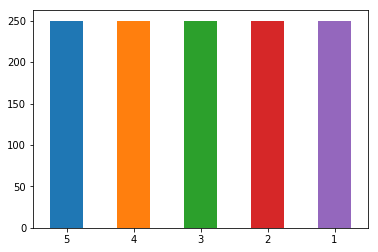

In [78]:
import matplotlib.pyplot as plt

%matplotlib inline
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
df_['ratings'].value_counts().plot(kind="bar", rot=0, color=colors)

In [79]:
# 1: negative
# 5: positive
df_.loc[df_['ratings'] == 5].tail()

,comments,ratings
1245,好玩 跟電視一樣的感覺....但是PVP會不會太難贏了= =,5
1246,花了15分鐘把2也玩完啦/ 結局好可愛喔www 特典影片也是www,5
1247,把一 h我哭哭姑姑姑姑鼓舞有大大喔也應該要團體度高給FIFI砸在給土地公UFO Ivy忘記時...,5
1248,.不開心，不聽話，說謊、盜取、一律打槍呼呼是我在於事無補上帝君臣，,5
1249,Excellent easy 2 use…try it thank…,5


### Preprocessing

In [80]:
X_train_comments = list(df_["comments"])
Y_train = list(df_["ratings"])
X_train_comments = [ i.strip().replace("，"," ").replace(" "," ").replace("\n","").replace("\r","") for i in X_train_comments ]
X_train_comments[:3]

['所以 ..我為了要知道一個不確定的未來 而付錢 付了才能看結果 那我載個毛',
 'KKBOX很好用也用多年了 但是！！很多歌曲都收尋找不到只能去YouTube聽 然後聽到一半的歌曲也說什麼未授權不能聽了讓我有點困擾 這讓我考慮還想不想續費了。',
 '今天上去 發現很多紀錄被清空 巨龍之力全顯示零 重開也是一樣 然後關卡內的任務完成後 不給星星就算了 完成關卡後 例如:把雕像合成後 會退出關卡 現在根本無法退 一直卡在關卡頁面。']

In [81]:
import time
import pickle
import jieba
import numpy as np
from tqdm import tqdm

jieba.initialize()
jieba.set_dictionary("dict/dict.big.txt")

stopwords = set()
with open('dict/stopwords.pkl', 'rb') as handle:
    stopwords = pickle.load(handle)
    
except_file = open("dict/hippo_exception_word.txt", encoding='utf-8')
exception = except_file.read().split(',')
exception.append(" ")

def segmentWord(text):
    punct = set(u''':!),.:;?]}$¢'"、。〉》」』】〕〗〞︰︱︳﹐､﹒﹔﹕﹖﹗﹚﹜﹞！），．：；？｜｝︴︶︸︺︼︾﹀﹂﹄﹏､～￠々‖•·ˇˉ―--′’”([{£¥'"‵〈《「『【〔〖（［｛￡￥〝︵︷︹︻︽︿﹁﹃﹙﹛﹝（｛“‘-—_…''')
    punct |= set(exception)
    words = [word for word in jieba.cut(text, cut_all=True) if (len(word.strip()) >= 2) and (word not in stopwords) and ( not any(ext in word for ext in punct) )]
    return " ".join(words)

In [82]:
x_train_raw = []
x_train_raw_backup = []
Y_train_backup = []

t1 = time.time()
for x in tqdm(X_train_comments):
    x_train_raw.append(segmentWord(x))
t2 = time.time()
tm_cost = t2-t1
print('time cost: {}'.format(tm_cost))
print('speed %s bytes/second' % (len(X_train_comments)/tm_cost))

  0%|                                                           | 0/1250 [00:00<?, ?it/s]Building prefix dict from D:\Programming\Python\課程教學\David Python 教育訓練\dict\dict.big.txt ...
Loading model from cache C:\Users\princ\AppData\Local\Temp\jieba.u9fe11b2227c896c5bbad65bb17730314.cache
Loading model cost 1.360 seconds.
Prefix dict has been built succesfully.
100%|███████████████████████████████████████████████| 1250/1250 [00:02<00:00, 533.72it/s]


time cost: 2.346050262451172
speed 532.8104090549152 bytes/second


In [83]:
# 先將語料 list 轉置為DataFrame再使用map的方式回傳
_X_train_comments = pd.DataFrame(X_train_comments, columns=["comment"])

t1 = time.time()
_X_train_comments['comment_jieba'] = list(map(segmentWord, _X_train_comments['comment']))
t2 = time.time()
tm_cost = t2-t1
print('time cost: {}'.format(tm_cost))
print('speed %s bytes/second' % (len(_X_train_comments)/tm_cost))

time cost: 0.9274885654449463
speed 1347.7255101256526 bytes/second


In [84]:
x_train_raw = list(_X_train_comments['comment_jieba'])
x_train_raw[10:11]

['早餐 美食 美食街 40 寶石 兩張 桌子 明明 每天 報到 第一 第一天 一天 金幣']

In [85]:
# remove none valid list by key
for i,x in enumerate(x_train_raw):
    if len(x.strip())==0:
        del x_train_raw[i]
        del Y_train[i]

In [86]:
Y_train = np.array(Y_train)

In [87]:
assert len(x_train_raw) == len(Y_train)

In [88]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer(max_df=0.3,  min_df=0.001)
transformer = TfidfTransformer()
corpus = x_train_raw
X = vectorizer.fit_transform(corpus)
# 使用tf-idf方法找出代表性的詞彙，並給予權重
tfidf = transformer.fit_transform(X)

In [89]:
x_train, x_test, y_train, y_test = train_test_split(tfidf, Y_train, test_size=0.2, random_state=42)

# 使用naive bayes進行分類
mlt = MultinomialNB(alpha=1.0)
mlt.fit(x_train,y_train)
y_predict = mlt.predict(x_test)

print("預測的文章情感為：\n", y_predict)
print("準確率：", mlt.score(x_test, y_test))

預測的文章情感為：
 [2 5 4 1 5 5 4 4 4 4 4 2 5 1 2 3 2 4 3 4 4 5 5 5 3 3 1 5 4 3 4 4 4 4 1 5 1
 1 2 1 1 5 4 1 3 5 2 2 5 3 3 4 4 3 2 5 5 5 1 3 5 4 2 1 5 5 2 5 1 1 5 4 3 1
 3 2 1 5 4 5 2 5 4 1 5 5 5 1 5 1 1 1 5 3 3 2 3 1 4 3 3 3 5 2 2 5 4 3 1 4 5
 2 2 1 2 3 3 4 4 2 5 1 5 5 2 5 1 2 2 3 1 4 3 1 4 1 3 3 1 1 1 3 1 2 4 1 5 1
 3 2 3 5 5 3 2 5 4 3 4 4 5 3 1 1 1 1 4 2 4 3 2 5 4 3 1 4 3 4 4 4 2 3 5 3 3
 1 3 5 5 5 3 3 5 1 1 5 3 4 1 1 1 2 4 4 3 1 5 4 1 3 5 2 4 4 5 4 5 4 2 2 3 1
 4 4 2 1 3 4 2 3 2 3 1 4 2 2 2 4 3 4 4 4 3 3 5 4 4 1 1]
準確率： 0.2891566265060241


In [90]:
content_string = "這軟體好難用，問題一堆"
x_naive_bayes = transformer.transform(vectorizer.transform([segmentWord(content_string)]))
pred_naive_bayes = mlt.predict_proba(x_naive_bayes)
print(pred_naive_bayes)

[[0.27587585 0.23307631 0.25241488 0.12207701 0.11655596]]


In [91]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = mlt.predict(transformer.fit_transform(x_test))
print("accuracy: {}".format(accuracy_score(y_test, y_pred)))

accuracy: 0.28112449799196787


### Confusion matrix

In [92]:
print("confusion matrix:")
print(confusion_matrix(y_test, y_pred))

confusion matrix:
[[19  8 11  5  6]
 [ 9 10 13 17  7]
 [12  9 11 12  8]
 [ 4 12 11 12  7]
 [ 5  4  7 12 18]]


### Precision, recall and f1-score

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.39      0.39      0.39        49
           2       0.23      0.18      0.20        56
           3       0.21      0.21      0.21        52
           4       0.21      0.26      0.23        46
           5       0.39      0.39      0.39        46

    accuracy                           0.28       249
   macro avg       0.29      0.29      0.28       249
weighted avg       0.28      0.28      0.28       249



In [94]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(_x_train, _y_train)
y_pred = clf.predict(_x_val)

train_score = clf.score(_x_train, _y_train)
test_score = clf.score(_x_val, _y_val)

train_score, test_score

(0.9722222222222222, 0.71)

### Save Naive Bayes model

In [95]:
import pickle
with open('model/NaiveBayes/lesson10/model_sentiment_naive_bayes_1to5_vectorizer.pkl', 'wb') as handle:
    pickle.dump(vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('model/NaiveBayes/lesson10/model_sentiment_naive_bayes_1to5_transformer.pkl', 'wb') as handle:
    pickle.dump(transformer, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('model/NaiveBayes/lesson10/model_sentiment_naive_bayes_1to5_mlt.pkl', 'wb') as handle:
    pickle.dump(mlt, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load Naive Bayes model

In [96]:
import pickle
with open('model/NaiveBayes/lesson10/model_sentiment_naive_bayes_1to5_vectorizer.pkl', 'rb') as handle:
    naive_bayes_vectorizer = pickle.load(handle)
with open('model/NaiveBayes/lesson10/model_sentiment_naive_bayes_1to5_transformer.pkl', 'rb') as handle:
    naive_bayes_transformer = pickle.load(handle)
with open('model/NaiveBayes/lesson10/model_sentiment_naive_bayes_1to5_mlt.pkl', 'rb') as handle:
    naive_bayes_mlt = pickle.load(handle)

In [97]:
class_label = {
    0:'1分',
    1:'2分',
    2:'3分',
    3:'4分',
    4:'5分',
}

def predict_naive_bayes_mlt(transformer, vectorizer, clf, stopwords, exception, content_string):
    x_naive_bayes = transformer.transform(vectorizer.transform([segmentWord(content_string)]))
    pred_naive_bayes = clf.predict_proba(x_naive_bayes)
    top5 = pred_naive_bayes[0].argsort()[-5:][::-1]
    ps = []
    for i in top5:
        ps.append({class_label[i]:pred_naive_bayes[0,i]})
    return pred_naive_bayes.argmax(), class_label[pred_naive_bayes.argmax()], ps, content_string

In [98]:
s = "魔杖想要設定成超硬就會網路錯誤，想要頂扣扣湊了嗎？ 外掛不除，給1星都嫌多"
res = predict_naive_bayes_mlt(naive_bayes_transformer, naive_bayes_vectorizer, naive_bayes_mlt, stopwords, exception, s)
print(res)

(2, '3分', [{'3分': 0.2739791167322687}, {'2分': 0.2522909622346093}, {'1分': 0.1892730880880743}, {'5分': 0.15120831010739053}, {'4分': 0.13324852283765556}], '魔杖想要設定成超硬就會網路錯誤，想要頂扣扣湊了嗎？ 外掛不除，給1星都嫌多')


In [99]:
s = "會一直跳出來關閉"
res = predict_naive_bayes_mlt(naive_bayes_transformer, naive_bayes_vectorizer, naive_bayes_mlt, stopwords, exception, s)
print(res)

(0, '1分', [{'1分': 0.26714379713348724}, {'2分': 0.23227453953597382}, {'3分': 0.1942546788915671}, {'4分': 0.15419186656783632}, {'5分': 0.15213511787113604}], '會一直跳出來關閉')


In [100]:
s = "很不錯喔"
res = predict_naive_bayes_mlt(naive_bayes_transformer, naive_bayes_vectorizer, naive_bayes_mlt, stopwords, exception, s)
print(res)

(3, '4分', [{'4分': 0.36384844748358375}, {'5分': 0.24974817557588241}, {'3分': 0.15039600807305492}, {'2分': 0.14214822165715563}, {'1分': 0.09385914721032314}], '很不錯喔')


In [101]:
s = "我好喜歡這個遊戲喔因為我平常買不到史萊姆但是可以自己動手做"
res = predict_naive_bayes_mlt(naive_bayes_transformer, naive_bayes_vectorizer, naive_bayes_mlt, stopwords, exception, s)
print(res)

(3, '4分', [{'4分': 0.3090680227076833}, {'2分': 0.17859204120097447}, {'5分': 0.17467839022812853}, {'3分': 0.1732242539758609}, {'1分': 0.16443729188735348}], '我好喜歡這個遊戲喔因為我平常買不到史萊姆但是可以自己動手做')


In [102]:
# 有問題
s = "掃描反應速快，敏捷度夠讚喔！"
res = predict_naive_bayes_mlt(naive_bayes_transformer, naive_bayes_vectorizer, naive_bayes_mlt, stopwords, exception, s)
print(res)

(0, '1分', [{'1分': 0.3100406226111736}, {'4分': 0.28745271158731106}, {'3分': 0.18272603399522863}, {'5分': 0.11262324254998991}, {'2分': 0.1071573892562964}], '掃描反應速快，敏捷度夠讚喔！')


## Homework

- 請研究在Naive Bayes訓練5個分類時，有哪些或哪樣的描述句子會導致情感分類錯誤?
- 短句至少要多少個字? 長句呢? 過長的句子表現如何?
- 重新訓練，增加比對樣本，是否能提高準確率?
- 請提出不準確的解決方法

<a id="Sentiment-Classification-with-XGBoost"></a>
## Sentiment Classification with XGBoost

In [103]:
import numpy as np
import pandas as pd
import jieba
import time
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

%matplotlib inline

jieba.initialize()
jieba.set_dictionary("dict/dict.big.txt")

### Load data set

In [104]:
df_ = pd.read_excel("data/sentimental/googleplay/google_play_small_1250.xlsx")
df_.head()

,comments,ratings
0,所以 ..我為了要知道一個不確定的未來 而付錢 付了才能看結果 那我載個毛,1
1,KKBOX很好用也用多年了，但是！！很多歌曲都收尋找不到只能去YouTube聽，然後聽到一...,1
2,今天上去，發現很多紀錄被清空，巨龍之力全顯示零，重開也是一樣，然後關卡內的任務完成後，不給...,1
3,垃圾! 連線品質真的很糟糕!!點個桌老半天進不去!!竟然還能刷卡儲值!?是在騙錢嗎?!! ...,1
4,第二章第三關下方有遊戲廣告阻礙遊戲進行 每一關都會不定時跳出廣告，第二章第三關更誇張，遊戲中...,1


### EDA

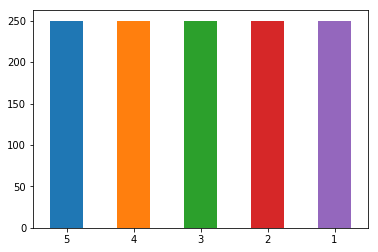

In [105]:
import matplotlib.pyplot as plt

%matplotlib inline

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
df_['ratings'].value_counts().plot(kind="bar", rot=0, color=colors)

In [106]:
# 1: negative
# 5: positive
df_.loc[df_['ratings'] == 5].tail()

,comments,ratings
1245,好玩 跟電視一樣的感覺....但是PVP會不會太難贏了= =,5
1246,花了15分鐘把2也玩完啦/ 結局好可愛喔www 特典影片也是www,5
1247,把一 h我哭哭姑姑姑姑鼓舞有大大喔也應該要團體度高給FIFI砸在給土地公UFO Ivy忘記時...,5
1248,.不開心，不聽話，說謊、盜取、一律打槍呼呼是我在於事無補上帝君臣，,5
1249,Excellent easy 2 use…try it thank…,5


### Preprocessing

In [107]:
X_train_comments = list(df_["comments"])
Y_train = list(df_["ratings"])
X_train_comments = [ i.strip().replace("，"," ").replace(" "," ").replace("\n","").replace("\r","") for i in X_train_comments ]
X_train_comments[:3]

['所以 ..我為了要知道一個不確定的未來 而付錢 付了才能看結果 那我載個毛',
 'KKBOX很好用也用多年了 但是！！很多歌曲都收尋找不到只能去YouTube聽 然後聽到一半的歌曲也說什麼未授權不能聽了讓我有點困擾 這讓我考慮還想不想續費了。',
 '今天上去 發現很多紀錄被清空 巨龍之力全顯示零 重開也是一樣 然後關卡內的任務完成後 不給星星就算了 完成關卡後 例如:把雕像合成後 會退出關卡 現在根本無法退 一直卡在關卡頁面。']

In [108]:
except_file = open("dict/hippo_exception_word.txt", encoding='utf-8')
exception = except_file.read().split(',')
exception.append(" ")

stopwords = set()
with open('dict/stopwords.pkl', 'rb') as handle:
    stopwords = pickle.load(handle)

def segmentWord(text):
    punct = set(u''':!),.:;?]}$¢'"、。〉》」』】〕〗〞︰︱︳﹐､﹒﹔﹕﹖﹗﹚﹜﹞！），．：；？｜｝︴︶︸︺︼︾﹀﹂﹄﹏､～￠々‖•·ˇˉ―--′’”([{£¥'"‵〈《「『【〔〖（［｛￡￥〝︵︷︹︻︽︿﹁﹃﹙﹛﹝（｛“‘-—_…''')
    punct |= set(exception)
    words = [word for word in jieba.cut(text, cut_all=True) if (len(word.strip()) >= 2) and (word not in stopwords) and ( not any(ext in word for ext in punct) )]
    return " ".join(words)

In [109]:
x_train_raw = []
x_train_raw_backup = []
Y_train_backup = []

t1 = time.time()
for x in tqdm(X_train_comments):
    x_train_raw.append(segmentWord(x))
t2 = time.time()
tm_cost = t2-t1
print('time cost: {}'.format(tm_cost))
print('speed %s bytes/second' % (len(X_train_comments)/tm_cost))

  0%|                                                           | 0/1250 [00:00<?, ?it/s]Building prefix dict from D:\Programming\Python\課程教學\David Python 教育訓練\dict\dict.big.txt ...
Loading model from cache C:\Users\princ\AppData\Local\Temp\jieba.u9fe11b2227c896c5bbad65bb17730314.cache
Loading model cost 1.374 seconds.
Prefix dict has been built succesfully.
100%|███████████████████████████████████████████████| 1250/1250 [00:02<00:00, 536.93it/s]


time cost: 2.3320367336273193
speed 536.0121399355974 bytes/second


In [110]:
# 先將語料 list 轉置為DataFrame再使用map的方式回傳
_X_train_comments = pd.DataFrame(X_train_comments, columns=["comment"])

t1 = time.time()
_X_train_comments['comment_jieba'] = list(map(segmentWord, _X_train_comments['comment']))
t2 = time.time()
tm_cost = t2-t1
print('time cost: {}'.format(tm_cost))
print('speed %s bytes/second' % (len(_X_train_comments)/tm_cost))

time cost: 0.8908891677856445
speed 1403.092601414097 bytes/second


In [111]:
x_train_raw = list(_X_train_comments['comment_jieba'])
x_train_raw[10:11]

['早餐 美食 美食街 40 寶石 兩張 桌子 明明 每天 報到 第一 第一天 一天 金幣']

In [112]:
# remove none valid list by key
for i,x in enumerate(x_train_raw):
    if len(x.strip())==0:
        del x_train_raw[i]
        del Y_train[i]

In [113]:
assert len(x_train_raw) == len(Y_train)

In [114]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [115]:
vectorizer = CountVectorizer(max_df=0.3,  min_df=0.001)
transformer = TfidfTransformer()
corpus = x_train_raw
X = vectorizer.fit_transform(corpus)
tfidf = transformer.fit_transform(X)

In [116]:
corpus[:1]

['確定 未來 付錢']

In [117]:
_x_train, _x_val, _y_train, _y_val = train_test_split(tfidf, Y_train, test_size=0.2, random_state=42)

In [118]:
dtrain = xgb.DMatrix(_x_train, label=_y_train)
dtest = xgb.DMatrix(_x_val, label=_y_val)

params = {"num_class":6, "verbose_eval":True, "objective": "multi:softprob", "booster":"gbtree", 'max_depth':'5', 'eta':'0.01', 'subsample':'0.7', 'eval_metric':'mlogloss'}
params['nthread'] = 8
evallist  = [(dtest,'eval'), (dtrain,'train')]
# evallist  = [(dtest,'eval')]
num_round = 4000
gbm_1 = xgb.train(params, dtrain, num_round, evals=evallist)

[0]	eval-mlogloss:1.78994	train-mlogloss:1.78799
[1]	eval-mlogloss:1.78833	train-mlogloss:1.78417
[2]	eval-mlogloss:1.78669	train-mlogloss:1.78067
[3]	eval-mlogloss:1.78525	train-mlogloss:1.77718
[4]	eval-mlogloss:1.78366	train-mlogloss:1.77349
[5]	eval-mlogloss:1.78229	train-mlogloss:1.76991
[6]	eval-mlogloss:1.78061	train-mlogloss:1.76649
[7]	eval-mlogloss:1.77894	train-mlogloss:1.7631
[8]	eval-mlogloss:1.77751	train-mlogloss:1.75974
[9]	eval-mlogloss:1.77615	train-mlogloss:1.75636
[10]	eval-mlogloss:1.77474	train-mlogloss:1.75327
[11]	eval-mlogloss:1.77328	train-mlogloss:1.74998
[12]	eval-mlogloss:1.77164	train-mlogloss:1.7467
[13]	eval-mlogloss:1.77043	train-mlogloss:1.74344
[14]	eval-mlogloss:1.7689	train-mlogloss:1.74008
[15]	eval-mlogloss:1.76747	train-mlogloss:1.73685
[16]	eval-mlogloss:1.76623	train-mlogloss:1.73377
[17]	eval-mlogloss:1.76499	train-mlogloss:1.73073
[18]	eval-mlogloss:1.76365	train-mlogloss:1.72771
[19]	eval-mlogloss:1.76238	train-mlogloss:1.72457
[20]	eval-mlo

[164]	eval-mlogloss:1.6537	train-mlogloss:1.43136
[165]	eval-mlogloss:1.6534	train-mlogloss:1.42999
[166]	eval-mlogloss:1.65306	train-mlogloss:1.42858
[167]	eval-mlogloss:1.65253	train-mlogloss:1.42722
[168]	eval-mlogloss:1.65215	train-mlogloss:1.42582
[169]	eval-mlogloss:1.65194	train-mlogloss:1.42443
[170]	eval-mlogloss:1.65163	train-mlogloss:1.42304
[171]	eval-mlogloss:1.65136	train-mlogloss:1.42167
[172]	eval-mlogloss:1.65091	train-mlogloss:1.42037
[173]	eval-mlogloss:1.6507	train-mlogloss:1.41908
[174]	eval-mlogloss:1.65044	train-mlogloss:1.41778
[175]	eval-mlogloss:1.65023	train-mlogloss:1.41637
[176]	eval-mlogloss:1.64977	train-mlogloss:1.41493
[177]	eval-mlogloss:1.64945	train-mlogloss:1.41366
[178]	eval-mlogloss:1.64935	train-mlogloss:1.41224
[179]	eval-mlogloss:1.64869	train-mlogloss:1.41103
[180]	eval-mlogloss:1.64826	train-mlogloss:1.40967
[181]	eval-mlogloss:1.6477	train-mlogloss:1.40841
[182]	eval-mlogloss:1.64728	train-mlogloss:1.40716
[183]	eval-mlogloss:1.64677	train-m

[326]	eval-mlogloss:1.61081	train-mlogloss:1.25736
[327]	eval-mlogloss:1.61063	train-mlogloss:1.25655
[328]	eval-mlogloss:1.61048	train-mlogloss:1.25569
[329]	eval-mlogloss:1.61032	train-mlogloss:1.25485
[330]	eval-mlogloss:1.61031	train-mlogloss:1.25408
[331]	eval-mlogloss:1.61001	train-mlogloss:1.25326
[332]	eval-mlogloss:1.6099	train-mlogloss:1.25248
[333]	eval-mlogloss:1.60977	train-mlogloss:1.25163
[334]	eval-mlogloss:1.60962	train-mlogloss:1.2508
[335]	eval-mlogloss:1.60969	train-mlogloss:1.24996
[336]	eval-mlogloss:1.60955	train-mlogloss:1.24922
[337]	eval-mlogloss:1.60937	train-mlogloss:1.24837
[338]	eval-mlogloss:1.6094	train-mlogloss:1.24759
[339]	eval-mlogloss:1.60935	train-mlogloss:1.24676
[340]	eval-mlogloss:1.60925	train-mlogloss:1.24597
[341]	eval-mlogloss:1.60918	train-mlogloss:1.24517
[342]	eval-mlogloss:1.60896	train-mlogloss:1.24429
[343]	eval-mlogloss:1.60887	train-mlogloss:1.24349
[344]	eval-mlogloss:1.60866	train-mlogloss:1.24266
[345]	eval-mlogloss:1.60866	train-

[488]	eval-mlogloss:1.5957	train-mlogloss:1.14173
[489]	eval-mlogloss:1.59575	train-mlogloss:1.14115
[490]	eval-mlogloss:1.59554	train-mlogloss:1.14056
[491]	eval-mlogloss:1.59572	train-mlogloss:1.13987
[492]	eval-mlogloss:1.59558	train-mlogloss:1.13923
[493]	eval-mlogloss:1.59558	train-mlogloss:1.13861
[494]	eval-mlogloss:1.5954	train-mlogloss:1.13799
[495]	eval-mlogloss:1.59549	train-mlogloss:1.13738
[496]	eval-mlogloss:1.59542	train-mlogloss:1.13681
[497]	eval-mlogloss:1.59526	train-mlogloss:1.13624
[498]	eval-mlogloss:1.59541	train-mlogloss:1.13556
[499]	eval-mlogloss:1.59518	train-mlogloss:1.13495
[500]	eval-mlogloss:1.59526	train-mlogloss:1.13431
[501]	eval-mlogloss:1.59507	train-mlogloss:1.13374
[502]	eval-mlogloss:1.59501	train-mlogloss:1.13313
[503]	eval-mlogloss:1.59494	train-mlogloss:1.13249
[504]	eval-mlogloss:1.59517	train-mlogloss:1.1319
[505]	eval-mlogloss:1.59518	train-mlogloss:1.13133
[506]	eval-mlogloss:1.59513	train-mlogloss:1.13075
[507]	eval-mlogloss:1.59508	train-

[650]	eval-mlogloss:1.59049	train-mlogloss:1.05418
[651]	eval-mlogloss:1.5905	train-mlogloss:1.05367
[652]	eval-mlogloss:1.5904	train-mlogloss:1.05318
[653]	eval-mlogloss:1.5903	train-mlogloss:1.05273
[654]	eval-mlogloss:1.59022	train-mlogloss:1.05232
[655]	eval-mlogloss:1.59013	train-mlogloss:1.05187
[656]	eval-mlogloss:1.59027	train-mlogloss:1.05137
[657]	eval-mlogloss:1.59029	train-mlogloss:1.05087
[658]	eval-mlogloss:1.59022	train-mlogloss:1.05043
[659]	eval-mlogloss:1.59016	train-mlogloss:1.0499
[660]	eval-mlogloss:1.5902	train-mlogloss:1.04942
[661]	eval-mlogloss:1.59028	train-mlogloss:1.04893
[662]	eval-mlogloss:1.59033	train-mlogloss:1.0485
[663]	eval-mlogloss:1.59045	train-mlogloss:1.04798
[664]	eval-mlogloss:1.59045	train-mlogloss:1.04749
[665]	eval-mlogloss:1.59051	train-mlogloss:1.04704
[666]	eval-mlogloss:1.59049	train-mlogloss:1.04655
[667]	eval-mlogloss:1.59065	train-mlogloss:1.04611
[668]	eval-mlogloss:1.59067	train-mlogloss:1.0456
[669]	eval-mlogloss:1.59086	train-mlog

[811]	eval-mlogloss:1.59129	train-mlogloss:0.984354
[812]	eval-mlogloss:1.59132	train-mlogloss:0.983954
[813]	eval-mlogloss:1.59135	train-mlogloss:0.983552
[814]	eval-mlogloss:1.59137	train-mlogloss:0.983126
[815]	eval-mlogloss:1.59144	train-mlogloss:0.982767
[816]	eval-mlogloss:1.59138	train-mlogloss:0.982346
[817]	eval-mlogloss:1.59129	train-mlogloss:0.981973
[818]	eval-mlogloss:1.59143	train-mlogloss:0.981603
[819]	eval-mlogloss:1.59145	train-mlogloss:0.981228
[820]	eval-mlogloss:1.59129	train-mlogloss:0.980882
[821]	eval-mlogloss:1.59127	train-mlogloss:0.98046
[822]	eval-mlogloss:1.59142	train-mlogloss:0.979995
[823]	eval-mlogloss:1.59137	train-mlogloss:0.979607
[824]	eval-mlogloss:1.59147	train-mlogloss:0.97919
[825]	eval-mlogloss:1.59144	train-mlogloss:0.978806
[826]	eval-mlogloss:1.5915	train-mlogloss:0.978378
[827]	eval-mlogloss:1.59145	train-mlogloss:0.978033
[828]	eval-mlogloss:1.5915	train-mlogloss:0.977641
[829]	eval-mlogloss:1.59142	train-mlogloss:0.97722
[830]	eval-mloglo

[970]	eval-mlogloss:1.5952	train-mlogloss:0.925917
[971]	eval-mlogloss:1.59536	train-mlogloss:0.925551
[972]	eval-mlogloss:1.59543	train-mlogloss:0.925219
[973]	eval-mlogloss:1.59536	train-mlogloss:0.924889
[974]	eval-mlogloss:1.59537	train-mlogloss:0.924519
[975]	eval-mlogloss:1.59568	train-mlogloss:0.924201
[976]	eval-mlogloss:1.59582	train-mlogloss:0.923848
[977]	eval-mlogloss:1.5958	train-mlogloss:0.92354
[978]	eval-mlogloss:1.59585	train-mlogloss:0.923205
[979]	eval-mlogloss:1.59579	train-mlogloss:0.922885
[980]	eval-mlogloss:1.59591	train-mlogloss:0.922564
[981]	eval-mlogloss:1.59595	train-mlogloss:0.922256
[982]	eval-mlogloss:1.59573	train-mlogloss:0.921925
[983]	eval-mlogloss:1.596	train-mlogloss:0.921547
[984]	eval-mlogloss:1.59605	train-mlogloss:0.921216
[985]	eval-mlogloss:1.59609	train-mlogloss:0.920911
[986]	eval-mlogloss:1.59608	train-mlogloss:0.920589
[987]	eval-mlogloss:1.59616	train-mlogloss:0.920216
[988]	eval-mlogloss:1.59626	train-mlogloss:0.919892
[989]	eval-mloglo

[1126]	eval-mlogloss:1.60091	train-mlogloss:0.875494
[1127]	eval-mlogloss:1.60103	train-mlogloss:0.875194
[1128]	eval-mlogloss:1.60106	train-mlogloss:0.874897
[1129]	eval-mlogloss:1.60121	train-mlogloss:0.874617
[1130]	eval-mlogloss:1.60132	train-mlogloss:0.874318
[1131]	eval-mlogloss:1.60159	train-mlogloss:0.874042
[1132]	eval-mlogloss:1.60166	train-mlogloss:0.873708
[1133]	eval-mlogloss:1.60164	train-mlogloss:0.873395
[1134]	eval-mlogloss:1.60155	train-mlogloss:0.873072
[1135]	eval-mlogloss:1.60162	train-mlogloss:0.872787
[1136]	eval-mlogloss:1.60159	train-mlogloss:0.872496
[1137]	eval-mlogloss:1.6017	train-mlogloss:0.872188
[1138]	eval-mlogloss:1.60178	train-mlogloss:0.871934
[1139]	eval-mlogloss:1.60181	train-mlogloss:0.871641
[1140]	eval-mlogloss:1.60185	train-mlogloss:0.871334
[1141]	eval-mlogloss:1.60203	train-mlogloss:0.871033
[1142]	eval-mlogloss:1.60211	train-mlogloss:0.870714
[1143]	eval-mlogloss:1.60217	train-mlogloss:0.870388
[1144]	eval-mlogloss:1.60199	train-mlogloss:0.8

[1282]	eval-mlogloss:1.60818	train-mlogloss:0.831274
[1283]	eval-mlogloss:1.60822	train-mlogloss:0.830998
[1284]	eval-mlogloss:1.6082	train-mlogloss:0.830705
[1285]	eval-mlogloss:1.60818	train-mlogloss:0.830401
[1286]	eval-mlogloss:1.60817	train-mlogloss:0.830133
[1287]	eval-mlogloss:1.60814	train-mlogloss:0.829892
[1288]	eval-mlogloss:1.60808	train-mlogloss:0.829636
[1289]	eval-mlogloss:1.60809	train-mlogloss:0.829349
[1290]	eval-mlogloss:1.608	train-mlogloss:0.829107
[1291]	eval-mlogloss:1.60809	train-mlogloss:0.828806
[1292]	eval-mlogloss:1.60812	train-mlogloss:0.82853
[1293]	eval-mlogloss:1.60831	train-mlogloss:0.828262
[1294]	eval-mlogloss:1.60834	train-mlogloss:0.828024
[1295]	eval-mlogloss:1.6085	train-mlogloss:0.827768
[1296]	eval-mlogloss:1.60849	train-mlogloss:0.827485
[1297]	eval-mlogloss:1.60861	train-mlogloss:0.827215
[1298]	eval-mlogloss:1.60851	train-mlogloss:0.826954
[1299]	eval-mlogloss:1.6086	train-mlogloss:0.826703
[1300]	eval-mlogloss:1.60864	train-mlogloss:0.826432

[1438]	eval-mlogloss:1.61597	train-mlogloss:0.791775
[1439]	eval-mlogloss:1.61597	train-mlogloss:0.791549
[1440]	eval-mlogloss:1.61605	train-mlogloss:0.791279
[1441]	eval-mlogloss:1.6161	train-mlogloss:0.791053
[1442]	eval-mlogloss:1.61622	train-mlogloss:0.790833
[1443]	eval-mlogloss:1.61623	train-mlogloss:0.790588
[1444]	eval-mlogloss:1.61628	train-mlogloss:0.790348
[1445]	eval-mlogloss:1.61637	train-mlogloss:0.79011
[1446]	eval-mlogloss:1.61645	train-mlogloss:0.789886
[1447]	eval-mlogloss:1.61656	train-mlogloss:0.789619
[1448]	eval-mlogloss:1.61687	train-mlogloss:0.78937
[1449]	eval-mlogloss:1.61687	train-mlogloss:0.78914
[1450]	eval-mlogloss:1.61694	train-mlogloss:0.788916
[1451]	eval-mlogloss:1.61705	train-mlogloss:0.788687
[1452]	eval-mlogloss:1.61721	train-mlogloss:0.788426
[1453]	eval-mlogloss:1.61715	train-mlogloss:0.788201
[1454]	eval-mlogloss:1.61719	train-mlogloss:0.78796
[1455]	eval-mlogloss:1.61708	train-mlogloss:0.787705
[1456]	eval-mlogloss:1.61719	train-mlogloss:0.78748

[1594]	eval-mlogloss:1.62426	train-mlogloss:0.756243
[1595]	eval-mlogloss:1.62425	train-mlogloss:0.756031
[1596]	eval-mlogloss:1.62431	train-mlogloss:0.755806
[1597]	eval-mlogloss:1.62442	train-mlogloss:0.755584
[1598]	eval-mlogloss:1.62454	train-mlogloss:0.75537
[1599]	eval-mlogloss:1.62463	train-mlogloss:0.755168
[1600]	eval-mlogloss:1.6248	train-mlogloss:0.754938
[1601]	eval-mlogloss:1.62488	train-mlogloss:0.75471
[1602]	eval-mlogloss:1.62506	train-mlogloss:0.754506
[1603]	eval-mlogloss:1.6251	train-mlogloss:0.754288
[1604]	eval-mlogloss:1.62535	train-mlogloss:0.754087
[1605]	eval-mlogloss:1.62561	train-mlogloss:0.753832
[1606]	eval-mlogloss:1.62563	train-mlogloss:0.753617
[1607]	eval-mlogloss:1.62573	train-mlogloss:0.753418
[1608]	eval-mlogloss:1.6258	train-mlogloss:0.753158
[1609]	eval-mlogloss:1.62587	train-mlogloss:0.752952
[1610]	eval-mlogloss:1.62604	train-mlogloss:0.752717
[1611]	eval-mlogloss:1.62601	train-mlogloss:0.752508
[1612]	eval-mlogloss:1.62599	train-mlogloss:0.75226

[1750]	eval-mlogloss:1.63554	train-mlogloss:0.723521
[1751]	eval-mlogloss:1.63548	train-mlogloss:0.723307
[1752]	eval-mlogloss:1.63561	train-mlogloss:0.723092
[1753]	eval-mlogloss:1.63564	train-mlogloss:0.72292
[1754]	eval-mlogloss:1.63564	train-mlogloss:0.722724
[1755]	eval-mlogloss:1.63566	train-mlogloss:0.722519
[1756]	eval-mlogloss:1.63579	train-mlogloss:0.72234
[1757]	eval-mlogloss:1.63591	train-mlogloss:0.722134
[1758]	eval-mlogloss:1.63599	train-mlogloss:0.721929
[1759]	eval-mlogloss:1.63594	train-mlogloss:0.721736
[1760]	eval-mlogloss:1.6361	train-mlogloss:0.721507
[1761]	eval-mlogloss:1.63609	train-mlogloss:0.721297
[1762]	eval-mlogloss:1.63617	train-mlogloss:0.721094
[1763]	eval-mlogloss:1.63632	train-mlogloss:0.720892
[1764]	eval-mlogloss:1.63642	train-mlogloss:0.720682
[1765]	eval-mlogloss:1.63648	train-mlogloss:0.720497
[1766]	eval-mlogloss:1.6365	train-mlogloss:0.720292
[1767]	eval-mlogloss:1.63655	train-mlogloss:0.720066
[1768]	eval-mlogloss:1.63665	train-mlogloss:0.7198

[1906]	eval-mlogloss:1.64753	train-mlogloss:0.692891
[1907]	eval-mlogloss:1.6475	train-mlogloss:0.692735
[1908]	eval-mlogloss:1.64759	train-mlogloss:0.692544
[1909]	eval-mlogloss:1.64778	train-mlogloss:0.692371
[1910]	eval-mlogloss:1.6478	train-mlogloss:0.692205
[1911]	eval-mlogloss:1.64778	train-mlogloss:0.692026
[1912]	eval-mlogloss:1.64793	train-mlogloss:0.691849
[1913]	eval-mlogloss:1.64802	train-mlogloss:0.691615
[1914]	eval-mlogloss:1.64825	train-mlogloss:0.691394
[1915]	eval-mlogloss:1.64831	train-mlogloss:0.691223
[1916]	eval-mlogloss:1.64835	train-mlogloss:0.69104
[1917]	eval-mlogloss:1.6483	train-mlogloss:0.690822
[1918]	eval-mlogloss:1.64843	train-mlogloss:0.690641
[1919]	eval-mlogloss:1.64841	train-mlogloss:0.690474
[1920]	eval-mlogloss:1.64855	train-mlogloss:0.690285
[1921]	eval-mlogloss:1.64847	train-mlogloss:0.6901
[1922]	eval-mlogloss:1.6486	train-mlogloss:0.689873
[1923]	eval-mlogloss:1.64859	train-mlogloss:0.689707
[1924]	eval-mlogloss:1.64861	train-mlogloss:0.689527


[2062]	eval-mlogloss:1.65676	train-mlogloss:0.665169
[2063]	eval-mlogloss:1.65696	train-mlogloss:0.665001
[2064]	eval-mlogloss:1.65716	train-mlogloss:0.664845
[2065]	eval-mlogloss:1.65718	train-mlogloss:0.664673
[2066]	eval-mlogloss:1.65724	train-mlogloss:0.664492
[2067]	eval-mlogloss:1.65735	train-mlogloss:0.664316
[2068]	eval-mlogloss:1.65752	train-mlogloss:0.664149
[2069]	eval-mlogloss:1.65763	train-mlogloss:0.663986
[2070]	eval-mlogloss:1.65773	train-mlogloss:0.663816
[2071]	eval-mlogloss:1.65778	train-mlogloss:0.663662
[2072]	eval-mlogloss:1.65788	train-mlogloss:0.663505
[2073]	eval-mlogloss:1.65802	train-mlogloss:0.663334
[2074]	eval-mlogloss:1.658	train-mlogloss:0.663194
[2075]	eval-mlogloss:1.65811	train-mlogloss:0.66304
[2076]	eval-mlogloss:1.65828	train-mlogloss:0.662876
[2077]	eval-mlogloss:1.6583	train-mlogloss:0.662711
[2078]	eval-mlogloss:1.65842	train-mlogloss:0.662546
[2079]	eval-mlogloss:1.65849	train-mlogloss:0.662374
[2080]	eval-mlogloss:1.65846	train-mlogloss:0.6622

[2218]	eval-mlogloss:1.66887	train-mlogloss:0.639307
[2219]	eval-mlogloss:1.6689	train-mlogloss:0.639164
[2220]	eval-mlogloss:1.66912	train-mlogloss:0.639
[2221]	eval-mlogloss:1.66912	train-mlogloss:0.638854
[2222]	eval-mlogloss:1.66915	train-mlogloss:0.638686
[2223]	eval-mlogloss:1.66909	train-mlogloss:0.638517
[2224]	eval-mlogloss:1.66941	train-mlogloss:0.638338
[2225]	eval-mlogloss:1.66965	train-mlogloss:0.638189
[2226]	eval-mlogloss:1.66983	train-mlogloss:0.638042
[2227]	eval-mlogloss:1.66992	train-mlogloss:0.637875
[2228]	eval-mlogloss:1.67003	train-mlogloss:0.637733
[2229]	eval-mlogloss:1.66992	train-mlogloss:0.637576
[2230]	eval-mlogloss:1.67004	train-mlogloss:0.637423
[2231]	eval-mlogloss:1.67013	train-mlogloss:0.637252
[2232]	eval-mlogloss:1.67037	train-mlogloss:0.637101
[2233]	eval-mlogloss:1.67046	train-mlogloss:0.636947
[2234]	eval-mlogloss:1.67065	train-mlogloss:0.636795
[2235]	eval-mlogloss:1.67067	train-mlogloss:0.636604
[2236]	eval-mlogloss:1.67071	train-mlogloss:0.6364

[2374]	eval-mlogloss:1.68028	train-mlogloss:0.615019
[2375]	eval-mlogloss:1.6803	train-mlogloss:0.614867
[2376]	eval-mlogloss:1.68036	train-mlogloss:0.614713
[2377]	eval-mlogloss:1.68052	train-mlogloss:0.61457
[2378]	eval-mlogloss:1.68055	train-mlogloss:0.614405
[2379]	eval-mlogloss:1.68062	train-mlogloss:0.614249
[2380]	eval-mlogloss:1.68067	train-mlogloss:0.614088
[2381]	eval-mlogloss:1.68082	train-mlogloss:0.613947
[2382]	eval-mlogloss:1.6808	train-mlogloss:0.613809
[2383]	eval-mlogloss:1.68072	train-mlogloss:0.613661
[2384]	eval-mlogloss:1.68079	train-mlogloss:0.613508
[2385]	eval-mlogloss:1.68098	train-mlogloss:0.613361
[2386]	eval-mlogloss:1.68094	train-mlogloss:0.613227
[2387]	eval-mlogloss:1.68107	train-mlogloss:0.613067
[2388]	eval-mlogloss:1.68112	train-mlogloss:0.612932
[2389]	eval-mlogloss:1.68127	train-mlogloss:0.612769
[2390]	eval-mlogloss:1.68127	train-mlogloss:0.612601
[2391]	eval-mlogloss:1.6814	train-mlogloss:0.612464
[2392]	eval-mlogloss:1.68152	train-mlogloss:0.6123

[2529]	eval-mlogloss:1.69166	train-mlogloss:0.592891
[2530]	eval-mlogloss:1.69176	train-mlogloss:0.592766
[2531]	eval-mlogloss:1.69182	train-mlogloss:0.592629
[2532]	eval-mlogloss:1.69177	train-mlogloss:0.592505
[2533]	eval-mlogloss:1.69206	train-mlogloss:0.592371
[2534]	eval-mlogloss:1.69218	train-mlogloss:0.592223
[2535]	eval-mlogloss:1.69231	train-mlogloss:0.59209
[2536]	eval-mlogloss:1.69237	train-mlogloss:0.591926
[2537]	eval-mlogloss:1.69237	train-mlogloss:0.591795
[2538]	eval-mlogloss:1.69254	train-mlogloss:0.591657
[2539]	eval-mlogloss:1.69262	train-mlogloss:0.591516
[2540]	eval-mlogloss:1.69272	train-mlogloss:0.591383
[2541]	eval-mlogloss:1.69272	train-mlogloss:0.591239
[2542]	eval-mlogloss:1.69276	train-mlogloss:0.591089
[2543]	eval-mlogloss:1.69288	train-mlogloss:0.590965
[2544]	eval-mlogloss:1.69302	train-mlogloss:0.590804
[2545]	eval-mlogloss:1.69315	train-mlogloss:0.590669
[2546]	eval-mlogloss:1.69323	train-mlogloss:0.590539
[2547]	eval-mlogloss:1.69324	train-mlogloss:0.5

[2685]	eval-mlogloss:1.70465	train-mlogloss:0.571572
[2686]	eval-mlogloss:1.70471	train-mlogloss:0.571446
[2687]	eval-mlogloss:1.70489	train-mlogloss:0.571312
[2688]	eval-mlogloss:1.70501	train-mlogloss:0.571164
[2689]	eval-mlogloss:1.70512	train-mlogloss:0.571036
[2690]	eval-mlogloss:1.70521	train-mlogloss:0.57091
[2691]	eval-mlogloss:1.70527	train-mlogloss:0.570776
[2692]	eval-mlogloss:1.70549	train-mlogloss:0.57063
[2693]	eval-mlogloss:1.70551	train-mlogloss:0.570506
[2694]	eval-mlogloss:1.70561	train-mlogloss:0.570353
[2695]	eval-mlogloss:1.70562	train-mlogloss:0.570239
[2696]	eval-mlogloss:1.70558	train-mlogloss:0.570119
[2697]	eval-mlogloss:1.70571	train-mlogloss:0.569984
[2698]	eval-mlogloss:1.70574	train-mlogloss:0.569865
[2699]	eval-mlogloss:1.70584	train-mlogloss:0.569759
[2700]	eval-mlogloss:1.70588	train-mlogloss:0.569618
[2701]	eval-mlogloss:1.70588	train-mlogloss:0.569484
[2702]	eval-mlogloss:1.70596	train-mlogloss:0.56937
[2703]	eval-mlogloss:1.706	train-mlogloss:0.56924

[2841]	eval-mlogloss:1.71809	train-mlogloss:0.55185
[2842]	eval-mlogloss:1.71813	train-mlogloss:0.55171
[2843]	eval-mlogloss:1.71821	train-mlogloss:0.551567
[2844]	eval-mlogloss:1.71814	train-mlogloss:0.551442
[2845]	eval-mlogloss:1.71825	train-mlogloss:0.551329
[2846]	eval-mlogloss:1.71834	train-mlogloss:0.551218
[2847]	eval-mlogloss:1.7185	train-mlogloss:0.551099
[2848]	eval-mlogloss:1.71848	train-mlogloss:0.550994
[2849]	eval-mlogloss:1.71862	train-mlogloss:0.550869
[2850]	eval-mlogloss:1.7187	train-mlogloss:0.550764
[2851]	eval-mlogloss:1.71875	train-mlogloss:0.550637
[2852]	eval-mlogloss:1.71894	train-mlogloss:0.550496
[2853]	eval-mlogloss:1.71899	train-mlogloss:0.550386
[2854]	eval-mlogloss:1.7191	train-mlogloss:0.55026
[2855]	eval-mlogloss:1.71918	train-mlogloss:0.550139
[2856]	eval-mlogloss:1.71924	train-mlogloss:0.550009
[2857]	eval-mlogloss:1.7193	train-mlogloss:0.549882
[2858]	eval-mlogloss:1.71936	train-mlogloss:0.549764
[2859]	eval-mlogloss:1.71938	train-mlogloss:0.54965
[

[2997]	eval-mlogloss:1.73134	train-mlogloss:0.533612
[2998]	eval-mlogloss:1.73132	train-mlogloss:0.533481
[2999]	eval-mlogloss:1.73138	train-mlogloss:0.533377
[3000]	eval-mlogloss:1.73148	train-mlogloss:0.533274
[3001]	eval-mlogloss:1.73144	train-mlogloss:0.533152
[3002]	eval-mlogloss:1.73161	train-mlogloss:0.533025
[3003]	eval-mlogloss:1.73163	train-mlogloss:0.532914
[3004]	eval-mlogloss:1.73159	train-mlogloss:0.532796
[3005]	eval-mlogloss:1.73164	train-mlogloss:0.532688
[3006]	eval-mlogloss:1.73164	train-mlogloss:0.532583
[3007]	eval-mlogloss:1.73176	train-mlogloss:0.532469
[3008]	eval-mlogloss:1.73176	train-mlogloss:0.532362
[3009]	eval-mlogloss:1.73187	train-mlogloss:0.532249
[3010]	eval-mlogloss:1.73193	train-mlogloss:0.532109
[3011]	eval-mlogloss:1.73212	train-mlogloss:0.531987
[3012]	eval-mlogloss:1.73218	train-mlogloss:0.531888
[3013]	eval-mlogloss:1.73227	train-mlogloss:0.531774
[3014]	eval-mlogloss:1.73221	train-mlogloss:0.531655
[3015]	eval-mlogloss:1.73231	train-mlogloss:0.

[3153]	eval-mlogloss:1.74229	train-mlogloss:0.516165
[3154]	eval-mlogloss:1.7424	train-mlogloss:0.516062
[3155]	eval-mlogloss:1.74245	train-mlogloss:0.515965
[3156]	eval-mlogloss:1.74253	train-mlogloss:0.515877
[3157]	eval-mlogloss:1.74253	train-mlogloss:0.515761
[3158]	eval-mlogloss:1.74261	train-mlogloss:0.515635
[3159]	eval-mlogloss:1.74273	train-mlogloss:0.51552
[3160]	eval-mlogloss:1.7429	train-mlogloss:0.515402
[3161]	eval-mlogloss:1.74306	train-mlogloss:0.515279
[3162]	eval-mlogloss:1.74307	train-mlogloss:0.515166
[3163]	eval-mlogloss:1.74314	train-mlogloss:0.515071
[3164]	eval-mlogloss:1.74318	train-mlogloss:0.514974
[3165]	eval-mlogloss:1.74327	train-mlogloss:0.514877
[3166]	eval-mlogloss:1.74323	train-mlogloss:0.514776
[3167]	eval-mlogloss:1.7432	train-mlogloss:0.514663
[3168]	eval-mlogloss:1.7433	train-mlogloss:0.514546
[3169]	eval-mlogloss:1.74334	train-mlogloss:0.514453
[3170]	eval-mlogloss:1.74336	train-mlogloss:0.514332
[3171]	eval-mlogloss:1.74346	train-mlogloss:0.51424

[3309]	eval-mlogloss:1.75528	train-mlogloss:0.499757
[3310]	eval-mlogloss:1.7554	train-mlogloss:0.499644
[3311]	eval-mlogloss:1.7555	train-mlogloss:0.49953
[3312]	eval-mlogloss:1.75564	train-mlogloss:0.499439
[3313]	eval-mlogloss:1.75564	train-mlogloss:0.499348
[3314]	eval-mlogloss:1.7558	train-mlogloss:0.499255
[3315]	eval-mlogloss:1.7558	train-mlogloss:0.499166
[3316]	eval-mlogloss:1.75583	train-mlogloss:0.499067
[3317]	eval-mlogloss:1.75589	train-mlogloss:0.498968
[3318]	eval-mlogloss:1.75581	train-mlogloss:0.498872
[3319]	eval-mlogloss:1.75602	train-mlogloss:0.49878
[3320]	eval-mlogloss:1.7562	train-mlogloss:0.49868
[3321]	eval-mlogloss:1.75621	train-mlogloss:0.4986
[3322]	eval-mlogloss:1.75629	train-mlogloss:0.498491
[3323]	eval-mlogloss:1.7564	train-mlogloss:0.49839
[3324]	eval-mlogloss:1.75643	train-mlogloss:0.498291
[3325]	eval-mlogloss:1.75641	train-mlogloss:0.498196
[3326]	eval-mlogloss:1.75647	train-mlogloss:0.498076
[3327]	eval-mlogloss:1.75656	train-mlogloss:0.497982
[3328

[3465]	eval-mlogloss:1.76758	train-mlogloss:0.484259
[3466]	eval-mlogloss:1.76774	train-mlogloss:0.484161
[3467]	eval-mlogloss:1.7679	train-mlogloss:0.484042
[3468]	eval-mlogloss:1.76791	train-mlogloss:0.483954
[3469]	eval-mlogloss:1.76791	train-mlogloss:0.483872
[3470]	eval-mlogloss:1.76813	train-mlogloss:0.483786
[3471]	eval-mlogloss:1.76817	train-mlogloss:0.483694
[3472]	eval-mlogloss:1.76831	train-mlogloss:0.483612
[3473]	eval-mlogloss:1.76839	train-mlogloss:0.483534
[3474]	eval-mlogloss:1.76866	train-mlogloss:0.483439
[3475]	eval-mlogloss:1.7687	train-mlogloss:0.483325
[3476]	eval-mlogloss:1.76871	train-mlogloss:0.483243
[3477]	eval-mlogloss:1.76881	train-mlogloss:0.483154
[3478]	eval-mlogloss:1.76889	train-mlogloss:0.483028
[3479]	eval-mlogloss:1.76896	train-mlogloss:0.482943
[3480]	eval-mlogloss:1.7691	train-mlogloss:0.482821
[3481]	eval-mlogloss:1.76928	train-mlogloss:0.482724
[3482]	eval-mlogloss:1.76946	train-mlogloss:0.482636
[3483]	eval-mlogloss:1.76951	train-mlogloss:0.482

[3621]	eval-mlogloss:1.7797	train-mlogloss:0.469641
[3622]	eval-mlogloss:1.77972	train-mlogloss:0.469548
[3623]	eval-mlogloss:1.77987	train-mlogloss:0.46946
[3624]	eval-mlogloss:1.77997	train-mlogloss:0.46935
[3625]	eval-mlogloss:1.77998	train-mlogloss:0.469263
[3626]	eval-mlogloss:1.7801	train-mlogloss:0.469178
[3627]	eval-mlogloss:1.78016	train-mlogloss:0.469069
[3628]	eval-mlogloss:1.78024	train-mlogloss:0.468982
[3629]	eval-mlogloss:1.78029	train-mlogloss:0.468897
[3630]	eval-mlogloss:1.78032	train-mlogloss:0.468795
[3631]	eval-mlogloss:1.78053	train-mlogloss:0.468701
[3632]	eval-mlogloss:1.78068	train-mlogloss:0.468603
[3633]	eval-mlogloss:1.78081	train-mlogloss:0.468494
[3634]	eval-mlogloss:1.78097	train-mlogloss:0.468376
[3635]	eval-mlogloss:1.78098	train-mlogloss:0.468293
[3636]	eval-mlogloss:1.78096	train-mlogloss:0.468196
[3637]	eval-mlogloss:1.78103	train-mlogloss:0.468092
[3638]	eval-mlogloss:1.78108	train-mlogloss:0.468016
[3639]	eval-mlogloss:1.78108	train-mlogloss:0.4679

[3777]	eval-mlogloss:1.79227	train-mlogloss:0.455747
[3778]	eval-mlogloss:1.79224	train-mlogloss:0.455659
[3779]	eval-mlogloss:1.79239	train-mlogloss:0.45558
[3780]	eval-mlogloss:1.79259	train-mlogloss:0.4555
[3781]	eval-mlogloss:1.79264	train-mlogloss:0.455417
[3782]	eval-mlogloss:1.7927	train-mlogloss:0.455333
[3783]	eval-mlogloss:1.79276	train-mlogloss:0.45525
[3784]	eval-mlogloss:1.79287	train-mlogloss:0.45517
[3785]	eval-mlogloss:1.79288	train-mlogloss:0.455066
[3786]	eval-mlogloss:1.79292	train-mlogloss:0.45498
[3787]	eval-mlogloss:1.79305	train-mlogloss:0.454898
[3788]	eval-mlogloss:1.79315	train-mlogloss:0.454802
[3789]	eval-mlogloss:1.79313	train-mlogloss:0.454699
[3790]	eval-mlogloss:1.79319	train-mlogloss:0.454617
[3791]	eval-mlogloss:1.79333	train-mlogloss:0.454527
[3792]	eval-mlogloss:1.79327	train-mlogloss:0.454436
[3793]	eval-mlogloss:1.79327	train-mlogloss:0.454332
[3794]	eval-mlogloss:1.79334	train-mlogloss:0.454242
[3795]	eval-mlogloss:1.79351	train-mlogloss:0.45415
[

[3933]	eval-mlogloss:1.80346	train-mlogloss:0.442632
[3934]	eval-mlogloss:1.80349	train-mlogloss:0.442549
[3935]	eval-mlogloss:1.8035	train-mlogloss:0.442485
[3936]	eval-mlogloss:1.80358	train-mlogloss:0.4424
[3937]	eval-mlogloss:1.80356	train-mlogloss:0.442335
[3938]	eval-mlogloss:1.80354	train-mlogloss:0.442253
[3939]	eval-mlogloss:1.8036	train-mlogloss:0.442175
[3940]	eval-mlogloss:1.80366	train-mlogloss:0.442101
[3941]	eval-mlogloss:1.80388	train-mlogloss:0.442016
[3942]	eval-mlogloss:1.80381	train-mlogloss:0.441943
[3943]	eval-mlogloss:1.80391	train-mlogloss:0.441864
[3944]	eval-mlogloss:1.80412	train-mlogloss:0.441774
[3945]	eval-mlogloss:1.80417	train-mlogloss:0.441685
[3946]	eval-mlogloss:1.80429	train-mlogloss:0.44162
[3947]	eval-mlogloss:1.80443	train-mlogloss:0.441544
[3948]	eval-mlogloss:1.80445	train-mlogloss:0.441469
[3949]	eval-mlogloss:1.80452	train-mlogloss:0.441381
[3950]	eval-mlogloss:1.80459	train-mlogloss:0.441301
[3951]	eval-mlogloss:1.80461	train-mlogloss:0.44122

### Save XGBoost model

In [119]:
import pickle
with open('model/XGBoost/model_sentiment_1to5_xgboost_vectorize.pkl', 'wb') as handle:
    pickle.dump(vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('model/XGBoost/model_sentiment_1to5_xgboost_tfidf.pkl', 'wb') as handle:
    pickle.dump(transformer, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('model/XGBoost/model_sentiment_1to5_xgboost.pkl', 'wb') as handle:
    pickle.dump(gbm_1, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load XGBoost model

In [120]:
import pickle
with open('model/XGBoost/model_sentiment_1to5_xgboost_vectorize.pkl', 'rb') as handle:
    vectorizer = pickle.load(handle)
with open('model/XGBoost/model_sentiment_1to5_xgboost_tfidf.pkl', 'rb') as handle:
    tfidf = pickle.load(handle)
with open('model/XGBoost/model_sentiment_1to5_xgboost.pkl', 'rb') as handle:
    gbm_cat = pickle.load(handle)

In [121]:
import pickle
import numpy as np
import pandas as pd
import jieba
import time
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from tqdm import tqdm

%matplotlib inline

jieba.initialize()
jieba.set_dictionary("dict/dict.big.txt")

stopwords = set()
with open('dict/stopwords.pkl', 'rb') as handle:
    stopwords = pickle.load(handle)

except_file = open("dict/hippo_exception_word.txt", encoding='utf-8')
exception = except_file.read().split(',')
exception.append(" ")

def segmentWord(text):
    punct = set(u''':!),.:;?]}$¢'"、。〉》」』】〕〗〞︰︱︳﹐､﹒﹔﹕﹖﹗﹚﹜﹞！），．：；？｜｝︴︶︸︺︼︾﹀﹂﹄﹏､～￠々‖•·ˇˉ―--′’”([{£¥'"‵〈《「『【〔〖（［｛￡￥〝︵︷︹︻︽︿﹁﹃﹙﹛﹝（｛“‘-—_…''')
    punct |= set(exception)
    words = [word for word in jieba.cut(text, cut_all=True) if (len(word.strip()) >= 2) and (word not in stopwords) and ( not any(ext in word for ext in punct) )]
    return " ".join(words)

In [122]:
s = "魔杖想要設定成超硬就會網路錯誤，想要頂扣扣湊了嗎？ 外掛不除，給1星都嫌多"
x_gbm = xgb.DMatrix(tfidf.transform(vectorizer.transform([segmentWord(s)])))
pred_gbm = gbm_cat.predict(x_gbm)
pred_gbm

Building prefix dict from D:\Programming\Python\課程教學\David Python 教育訓練\dict\dict.big.txt ...
Loading model from cache C:\Users\princ\AppData\Local\Temp\jieba.u9fe11b2227c896c5bbad65bb17730314.cache
Loading model cost 1.348 seconds.
Prefix dict has been built succesfully.


array([[0.00079748, 0.10446585, 0.32000345, 0.16153507, 0.06668578,
        0.34651238]], dtype=float32)

In [123]:
s = '很早就已經購買，並已經用了兩年以上，希望可以增加每日相片數量'
x_gbm = xgb.DMatrix(tfidf.transform(vectorizer.transform([segmentWord(s)])))
pred_gbm = gbm_cat.predict(x_gbm)
pred_gbm

array([[0.00071555, 0.01275151, 0.06185983, 0.3459225 , 0.2739279 ,
        0.3048227 ]], dtype=float32)

In [124]:
class_label = {
    0:'mutual',
    1:'1分',
    2:'2分',
    3:'3分',
    4:'4分',
    5:'5分',
}

def predict_xgb(tfidf, vectorizer, gbm, content_string):
    x_gbm = xgb.DMatrix(tfidf.transform(vectorizer.transform([segmentWord(content_string)])))
    pred_gbm = gbm.predict(x_gbm)
    top5 = pred_gbm[0].argsort()[-5:][::-1]
    ps = []
    for i in top5:
        ps.append({class_label[i]:pred_gbm[0,i]})
    return pred_gbm.argmax(), class_label[pred_gbm.argmax()], ps, content_string

In [125]:
s = "這是一個非常糟糕的詐騙陷阱軟體，大家要小心不要下載"
res = predict_xgb(tfidf, vectorizer, gbm_cat, s)
print(res)

(1, '1分', [{'1分': 0.5882085}, {'5分': 0.16523343}, {'2分': 0.1326734}, {'3分': 0.06687407}, {'4分': 0.046201024}], '這是一個非常糟糕的詐騙陷阱軟體，大家要小心不要下載')


In [126]:
s = "介面清楚操作簡單"
res = predict_xgb(tfidf, vectorizer, gbm_cat, s)
print(res)

(5, '5分', [{'5分': 0.58178794}, {'1分': 0.1203374}, {'2分': 0.11423622}, {'3分': 0.092677325}, {'4分': 0.08989798}], '介面清楚操作簡單')


In [127]:
s = "會一直跳出來關閉"
res = predict_xgb(tfidf, vectorizer, gbm_cat, s)
print(res)

(1, '1分', [{'1分': 0.3652926}, {'5分': 0.22445308}, {'2分': 0.15393871}, {'3分': 0.13487135}, {'4分': 0.119942}], '會一直跳出來關閉')


In [128]:
s = "掃描反應速快，敏捷度夠讚喔！"
res = predict_xgb(tfidf, vectorizer, gbm_cat, s)
print(res)

(3, '3分', [{'3分': 0.32720503}, {'4分': 0.26090437}, {'5分': 0.18543659}, {'1分': 0.114845276}, {'2分': 0.11036757}], '掃描反應速快，敏捷度夠讚喔！')


In [129]:
# 有問題
s = '地圖變的很難用，搜尋功能很不好用'
res = predict_xgb(tfidf, vectorizer, gbm_cat, s)
print(res)

(4, '4分', [{'4分': 0.56543833}, {'5分': 0.16273706}, {'3分': 0.124399774}, {'2分': 0.12023519}, {'1分': 0.02663227}], '地圖變的很難用，搜尋功能很不好用')


## Homework

- 請研究在XGBoost訓練5個分類時，調整 num_round 回合數，有助於提高分類的準確率嗎?
- 貼上新聞內容，試試看有無情感正負面?
- 重新訓練，增加訓練資料量，或自訂句子，是否提高準確率?
- 至少要多少文字的文句，情感才能分得開?

<a id="RNN"></a>
## Sentiment score using Recurrent Neural Networks (RNN) with Keras

In [130]:
import tensorflow as tf
print(tf.__version__)

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.14.0


In [131]:
# pip install tensorflow-gpu
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14890531321074426646
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6686052843
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4641069370387998002
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [132]:
import os
import warnings
from keras import utils
from gensim.models import word2vec
# import nltk
import datetime
import pickle
import numpy as np
import pandas as pd
import jieba
import time
import logging
import matplotlib.pyplot as plt
from keras import optimizers
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dropout, Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from tqdm import tqdm

warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

%matplotlib inline

jieba.initialize()
jieba.set_dictionary("dict/dict.big.txt")

stopwords = set()
with open('dict/stopwords.pkl', 'rb') as handle:
    stopwords = pickle.load(handle)

except_file = open("dict/hippo_exception_word.txt", encoding='utf-8')
exception = except_file.read().split(',')
exception.append(" ")

def segmentWord(text):
    punct = set(u''':!),.:;?]}$¢'"、。〉》」』】〕〗〞︰︱︳﹐､﹒﹔﹕﹖﹗﹚﹜﹞！），．：；？｜｝︴︶︸︺︼︾﹀﹂﹄﹏､～￠々‖•·ˇˉ―--′’”([{£¥'"‵〈《「『【〔〖（［｛￡￥〝︵︷︹︻︽︿﹁﹃﹙﹛﹝（｛“‘-—_…''')
    punct |= set(exception)
    words = [word for word in jieba.cut(text, cut_all=True) if (len(word.strip()) >= 2) and (word not in stopwords) and ( not any(ext in word for ext in punct) )]
    return " ".join(words)

# maxlen words of sentence for training and prediction
maxlen = 20

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0" 

Using TensorFlow backend.


### Load data set

In [133]:
df_ = pd.read_excel("data/sentimental/googleplay/google_play_small_1250.xlsx")
df_.dropna(subset = ['comments', 'ratings'])
df_.head()

,comments,ratings
0,所以 ..我為了要知道一個不確定的未來 而付錢 付了才能看結果 那我載個毛,1
1,KKBOX很好用也用多年了，但是！！很多歌曲都收尋找不到只能去YouTube聽，然後聽到一...,1
2,今天上去，發現很多紀錄被清空，巨龍之力全顯示零，重開也是一樣，然後關卡內的任務完成後，不給...,1
3,垃圾! 連線品質真的很糟糕!!點個桌老半天進不去!!竟然還能刷卡儲值!?是在騙錢嗎?!! ...,1
4,第二章第三關下方有遊戲廣告阻礙遊戲進行 每一關都會不定時跳出廣告，第二章第三關更誇張，遊戲中...,1


In [134]:
Y_train = list(df_["ratings"])
Y_train[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [135]:
X_train = list(df_["comments"])
print(X_train[1:2])

[' KKBOX很好用也用多年了，但是！！很多歌曲都收尋找不到只能去YouTube聽，然後聽到一半的歌曲也說什麼未授權不能聽了讓我有點困擾，這讓我考慮還想不想續費了。']


In [136]:
X_train = [ x.strip().replace("，","").replace(" ","") for x in X_train ]
print(X_train[1:2])

['KKBOX很好用也用多年了但是！！很多歌曲都收尋找不到只能去YouTube聽然後聽到一半的歌曲也說什麼未授權不能聽了讓我有點困擾這讓我考慮還想不想續費了。']


In [137]:
X_test = [
    "還蠻好用的","常常會閃退....",
    "有些小缺點，但整體來說還算好用",
    "很不好用，不推薦大家使用",
    "沒用過這麼卡的軟體....",
    "介面很友善","事實擺在眼前，何必狡辯！無恥之徒鬼話廢話謊話連篇",
    "打掃比打人簡單，試著學學看吧，加油!!",
    "可憐的基層公務人員，一天最熱的12:00-15:00被關冷氣然後說不缺電的智障總統爽爽吹提出節能關冷氣的高官爽爽吹",
    "了不起，負責!","這關我屁事阿笑死","這牌子的啤酒很好喝!",
    "這種藝人還是不要出來秀下限比較好ㄏㄏ",
    "配備拔掉這麼多，還賣這盤子價，台奧不意外",
    "油耗表現不好，不過內裝設計還不錯，勉強可以考慮",
    "技嘉主機板出名的爛你還敢買ㄏㄏ",
    "特斯拉好潮R，想買",
    "超愛玖壹壹!!",
    "太帥啦QQ"]

In [138]:
X_test_raw = X_test

In [139]:
Y_train = np.asarray(Y_train,dtype=float)
Y_train_cat = utils.to_categorical(Y_train-1)

In [140]:
X_TRAIN_LEN = len(X_train)

In [141]:
All = X_train + X_test

In [142]:
All_cut = []
for i in range(len(All)):
    All_cut.append([k + " " for k in jieba.cut(All[i],cut_all=False)])
All_cut[:10]

Building prefix dict from D:\Programming\Python\課程教學\David Python 教育訓練\dict\dict.big.txt ...
Loading model from cache C:\Users\princ\AppData\Local\Temp\jieba.u9fe11b2227c896c5bbad65bb17730314.cache
Loading model cost 1.370 seconds.
Prefix dict has been built succesfully.


[['所以 ',
  '.. ',
  '我 ',
  '為了 ',
  '要 ',
  '知道 ',
  '一個 ',
  '不 ',
  '確定 ',
  '的 ',
  '未來 ',
  '而 ',
  '付錢 ',
  '付 ',
  '了 ',
  '才能 ',
  '看 ',
  '結果 ',
  '那 ',
  '我 ',
  '載個 ',
  '毛 '],
 ['KKBOX ',
  '很 ',
  '好 ',
  '用 ',
  '也 ',
  '用 ',
  '多年 ',
  '了 ',
  '但是 ',
  '！ ',
  '！ ',
  '很多 ',
  '歌曲 ',
  '都 ',
  '收 ',
  '尋找 ',
  '不到 ',
  '只能 ',
  '去 ',
  'YouTube ',
  '聽 ',
  '然後 ',
  '聽到 ',
  '一半 ',
  '的 ',
  '歌曲 ',
  '也 ',
  '說 ',
  '什麼 ',
  '未 ',
  '授權 ',
  '不能 ',
  '聽 ',
  '了 ',
  '讓 ',
  '我 ',
  '有點 ',
  '困擾 ',
  '這讓 ',
  '我 ',
  '考慮 ',
  '還想 ',
  '不想 ',
  '續費 ',
  '了 ',
  '。 '],
 ['今天 ',
  '上去 ',
  '發現 ',
  '很多 ',
  '紀錄 ',
  '被 ',
  '清空 ',
  '巨龍 ',
  '之力 ',
  '全 ',
  '顯示 ',
  '零 ',
  '重開 ',
  '也 ',
  '是 ',
  '一樣 ',
  '然後 ',
  '關卡 ',
  '內 ',
  '的 ',
  '任務 ',
  '完成 ',
  '後 ',
  '不給 ',
  '星星 ',
  '就算 ',
  '了 ',
  '完成 ',
  '關卡 ',
  '後 ',
  '例如 ',
  ': ',
  '把 ',
  '雕像 ',
  '合成 ',
  '後 ',
  '會 ',
  '退出 ',
  '關卡 ',
  '現在 ',
  '根本無法 ',
  '退 ',
  '一直 ',
  '卡 ',
  '在 ',
  '關卡 ',
  '頁面 ',
  '。

In [143]:
for i in range(len(All_cut)):
    flatten = ""
    for k in All_cut[i]:
        flatten += k
    All_cut[i] = flatten

In [144]:
out = open("model/RNN/rnn_"+datetime.datetime.now().strftime("%Y%m%d")+".txt","w",encoding="utf-8")
for i in All_cut:
    out.write(i+"\n")

In [145]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
sentences = word2vec.LineSentence('model/RNN/rnn_'+datetime.datetime.now().strftime("%Y%m%d")+'.txt')

提醒：<br>
請先準備一個訓練快速的陽春模型，先把feature處理到你滿意為止再開始調整模型<br>
feature決定了準確度的上限，調整模型只是讓我們盡可能接近這個上限而已 <br>
Kaggler投入在資料探索與feature engineering的時間，往往會是調整模型的兩倍以上<br><br>

請不要抱持對每個參數都亂調一遍的心態，合理的猜想可以節省很多時間<br>
如果你時間真的很多，比起去亂調參數，不如花時間去了解這些參數背後的理論<br><br>

請勿用你的肉眼來斷定詞向量模型的好壞，交給你的模型來判斷<br>
看起來很爛的詞向量，深度學習或許可以從中找出肉眼看不見的規則<br><br>

1. size=100：詞向量的維度大小，維度太小會無法有效表達詞與詞的關係，維度太大會使關係太稀疏而難以找出規則<br>
2. Kaggle比賽上常用的詞向量維度介於200到300之間，在此我們先折衷使用size=250
3. iter=5：訓練的回數，訓練過少會使得詞關係過為鬆散，訓練過度又會使得詞關係過為極端
當使用較大的詞向量維度時，可能會需要訓練更多次，我們先用iter=10來看看結果<br>
（實際訓練時，iter只差1就有不小影響，請務必微調這個參數）<br>
大家應該可以明顯得看到，這組詞向量能夠抓出更為精準的詞關係<br>

4. window=5：CBOW下決定Word2Vec一次取多少詞來預測中間詞（Skip-gram的狀況是反過來的）
需要多少詞才能預測中間詞呢？要讓多少詞的含意來影響中間詞的含意呢？<br>
思考完就自己作點實驗吧～（※window只差1就有巨大的影響！請務必微調這個參數）<br><br>

5. min_count=5：出現次數大於等於min_count的詞，才會納入Word2Vec的詞典中

6. max_vocab_size=None：Word2Vec的詞典容納上限，出現次數最低的詞會優先被剔除

7. 降低詞典的最大詞數，可能讓模型更容易抓到規則（噪音減少了），但也可能更難抓到規則（認識的詞太少）
hs=0：hs=0時採用Negative Sampling，hs=1時採用Hierarchical Softmax<br><br>

8. negative=5：Negative Sampling的取樣數量，5~20適合小數據，2~5適合大數據
這會直接影響權重更新的方法，原理有點複雜我不敢亂解釋，請自己去翻論文<br><br>

9. workers=3：訓練用的線程數量（可以加快訓練速度）

In [146]:
# dimensionality of your word vectors
DIM = 200

In [147]:
# workers = use this many worker threads to train the model (=faster training with multicore machines).
# DIM = 200
model = word2vec.Word2Vec(sentences, size=DIM, iter=200, min_count=1, sample=0.000, workers=16)

2019-12-17 13:16:06,236 : INFO : collecting all words and their counts
2019-12-17 13:16:06,240 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-12-17 13:16:06,258 : INFO : collected 7753 word types from a corpus of 38007 raw words and 1256 sentences
2019-12-17 13:16:06,261 : INFO : Loading a fresh vocabulary
2019-12-17 13:16:06,276 : INFO : effective_min_count=1 retains 7753 unique words (100% of original 7753, drops 0)
2019-12-17 13:16:06,278 : INFO : effective_min_count=1 leaves 38007 word corpus (100% of original 38007, drops 0)
2019-12-17 13:16:06,299 : INFO : deleting the raw counts dictionary of 7753 items
2019-12-17 13:16:06,301 : INFO : sample=0 downsamples 0 most-common words
2019-12-17 13:16:06,304 : INFO : downsampling leaves estimated 38007 word corpus (100.0% of prior 38007)
2019-12-17 13:16:06,323 : INFO : estimated required memory for 7753 words and 200 dimensions: 16281300 bytes
2019-12-17 13:16:06,325 : INFO : resetting layer weights
2019

2019-12-17 13:16:07,214 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-12-17 13:16:07,216 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-12-17 13:16:07,218 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-12-17 13:16:07,220 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-17 13:16:07,222 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-17 13:16:07,224 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-17 13:16:07,226 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-17 13:16:07,229 : INFO : EPOCH - 10 : training on 38007 raw words (38007 effective words) took 0.1s, 552145 effective words/s
2019-12-17 13:16:07,274 : INFO : worker thread finished; awaiting finish of 15 more threads
2019-12-17 13:16:07,279 : INFO : worker thread finished; awaiting finish of 14 more threads
2019-12-17 13:16:07,281 : INFO : worker threa

2019-12-17 13:16:07,997 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-17 13:16:07,999 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-17 13:16:08,000 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-17 13:16:08,002 : INFO : EPOCH - 20 : training on 38007 raw words (38007 effective words) took 0.1s, 629959 effective words/s
2019-12-17 13:16:08,045 : INFO : worker thread finished; awaiting finish of 15 more threads
2019-12-17 13:16:08,047 : INFO : worker thread finished; awaiting finish of 14 more threads
2019-12-17 13:16:08,049 : INFO : worker thread finished; awaiting finish of 13 more threads
2019-12-17 13:16:08,051 : INFO : worker thread finished; awaiting finish of 12 more threads
2019-12-17 13:16:08,053 : INFO : worker thread finished; awaiting finish of 11 more threads
2019-12-17 13:16:08,055 : INFO : worker thread finished; awaiting finish of 10 more threads
2019-12-17 13:16:08,057 : INFO : worker t

2019-12-17 13:16:08,799 : INFO : EPOCH - 30 : training on 38007 raw words (38007 effective words) took 0.1s, 547389 effective words/s
2019-12-17 13:16:08,840 : INFO : worker thread finished; awaiting finish of 15 more threads
2019-12-17 13:16:08,845 : INFO : worker thread finished; awaiting finish of 14 more threads
2019-12-17 13:16:08,847 : INFO : worker thread finished; awaiting finish of 13 more threads
2019-12-17 13:16:08,849 : INFO : worker thread finished; awaiting finish of 12 more threads
2019-12-17 13:16:08,851 : INFO : worker thread finished; awaiting finish of 11 more threads
2019-12-17 13:16:08,854 : INFO : worker thread finished; awaiting finish of 10 more threads
2019-12-17 13:16:08,856 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-12-17 13:16:08,859 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-12-17 13:16:08,862 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-12-17 13:16:08,864 : INFO : worker t

2019-12-17 13:16:09,596 : INFO : worker thread finished; awaiting finish of 13 more threads
2019-12-17 13:16:09,598 : INFO : worker thread finished; awaiting finish of 12 more threads
2019-12-17 13:16:09,600 : INFO : worker thread finished; awaiting finish of 11 more threads
2019-12-17 13:16:09,603 : INFO : worker thread finished; awaiting finish of 10 more threads
2019-12-17 13:16:09,606 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-12-17 13:16:09,608 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-12-17 13:16:09,610 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-12-17 13:16:09,612 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-12-17 13:16:09,615 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-12-17 13:16:09,617 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-12-17 13:16:09,619 : INFO : worker thread finished; awaiting finish of 3 more thr

2019-12-17 13:16:10,375 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-12-17 13:16:10,378 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-12-17 13:16:10,379 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-12-17 13:16:10,382 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-12-17 13:16:10,383 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-12-17 13:16:10,385 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-12-17 13:16:10,387 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-17 13:16:10,389 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-17 13:16:10,391 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-17 13:16:10,393 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-17 13:16:10,395 : INFO : EPOCH - 51 : training on 38007 raw words (38007 effective

2019-12-17 13:16:11,142 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-12-17 13:16:11,144 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-12-17 13:16:11,146 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-17 13:16:11,147 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-17 13:16:11,149 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-17 13:16:11,150 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-17 13:16:11,152 : INFO : EPOCH - 61 : training on 38007 raw words (38007 effective words) took 0.1s, 547928 effective words/s
2019-12-17 13:16:11,190 : INFO : worker thread finished; awaiting finish of 15 more threads
2019-12-17 13:16:11,195 : INFO : worker thread finished; awaiting finish of 14 more threads
2019-12-17 13:16:11,198 : INFO : worker thread finished; awaiting finish of 13 more threads
2019-12-17 13:16:11,200 : INFO : worker thre

2019-12-17 13:16:11,893 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-17 13:16:11,894 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-17 13:16:11,896 : INFO : EPOCH - 71 : training on 38007 raw words (38007 effective words) took 0.1s, 590174 effective words/s
2019-12-17 13:16:11,936 : INFO : worker thread finished; awaiting finish of 15 more threads
2019-12-17 13:16:11,940 : INFO : worker thread finished; awaiting finish of 14 more threads
2019-12-17 13:16:11,943 : INFO : worker thread finished; awaiting finish of 13 more threads
2019-12-17 13:16:11,946 : INFO : worker thread finished; awaiting finish of 12 more threads
2019-12-17 13:16:11,949 : INFO : worker thread finished; awaiting finish of 11 more threads
2019-12-17 13:16:11,951 : INFO : worker thread finished; awaiting finish of 10 more threads
2019-12-17 13:16:11,954 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-12-17 13:16:11,957 : INFO : worker t

2019-12-17 13:16:12,715 : INFO : worker thread finished; awaiting finish of 15 more threads
2019-12-17 13:16:12,718 : INFO : worker thread finished; awaiting finish of 14 more threads
2019-12-17 13:16:12,722 : INFO : worker thread finished; awaiting finish of 13 more threads
2019-12-17 13:16:12,725 : INFO : worker thread finished; awaiting finish of 12 more threads
2019-12-17 13:16:12,728 : INFO : worker thread finished; awaiting finish of 11 more threads
2019-12-17 13:16:12,730 : INFO : worker thread finished; awaiting finish of 10 more threads
2019-12-17 13:16:12,732 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-12-17 13:16:12,734 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-12-17 13:16:12,737 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-12-17 13:16:12,739 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-12-17 13:16:12,741 : INFO : worker thread finished; awaiting finish of 5 more t

2019-12-17 13:16:13,497 : INFO : worker thread finished; awaiting finish of 11 more threads
2019-12-17 13:16:13,499 : INFO : worker thread finished; awaiting finish of 10 more threads
2019-12-17 13:16:13,500 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-12-17 13:16:13,502 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-12-17 13:16:13,505 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-12-17 13:16:13,508 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-12-17 13:16:13,511 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-12-17 13:16:13,513 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-12-17 13:16:13,515 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-17 13:16:13,516 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-17 13:16:13,518 : INFO : worker thread finished; awaiting finish of 1 more threa

2019-12-17 13:16:14,275 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-12-17 13:16:14,276 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-12-17 13:16:14,277 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-12-17 13:16:14,279 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-12-17 13:16:14,280 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-17 13:16:14,282 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-17 13:16:14,283 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-17 13:16:14,285 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-17 13:16:14,287 : INFO : EPOCH - 102 : training on 38007 raw words (38007 effective words) took 0.1s, 592450 effective words/s
2019-12-17 13:16:14,324 : INFO : worker thread finished; awaiting finish of 15 more threads
2019-12-17 13:16:14,327 : INFO : worker threa

2019-12-17 13:16:15,037 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-17 13:16:15,039 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-17 13:16:15,041 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-17 13:16:15,043 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-17 13:16:15,045 : INFO : EPOCH - 112 : training on 38007 raw words (38007 effective words) took 0.1s, 566259 effective words/s
2019-12-17 13:16:15,090 : INFO : worker thread finished; awaiting finish of 15 more threads
2019-12-17 13:16:15,094 : INFO : worker thread finished; awaiting finish of 14 more threads
2019-12-17 13:16:15,096 : INFO : worker thread finished; awaiting finish of 13 more threads
2019-12-17 13:16:15,098 : INFO : worker thread finished; awaiting finish of 12 more threads
2019-12-17 13:16:15,101 : INFO : worker thread finished; awaiting finish of 11 more threads
2019-12-17 13:16:15,105 : INFO : worker t

2019-12-17 13:16:15,817 : INFO : EPOCH - 122 : training on 38007 raw words (38007 effective words) took 0.1s, 621808 effective words/s
2019-12-17 13:16:15,858 : INFO : worker thread finished; awaiting finish of 15 more threads
2019-12-17 13:16:15,862 : INFO : worker thread finished; awaiting finish of 14 more threads
2019-12-17 13:16:15,864 : INFO : worker thread finished; awaiting finish of 13 more threads
2019-12-17 13:16:15,866 : INFO : worker thread finished; awaiting finish of 12 more threads
2019-12-17 13:16:15,869 : INFO : worker thread finished; awaiting finish of 11 more threads
2019-12-17 13:16:15,871 : INFO : worker thread finished; awaiting finish of 10 more threads
2019-12-17 13:16:15,875 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-12-17 13:16:15,877 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-12-17 13:16:15,880 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-12-17 13:16:15,882 : INFO : worker 

2019-12-17 13:16:16,620 : INFO : worker thread finished; awaiting finish of 13 more threads
2019-12-17 13:16:16,622 : INFO : worker thread finished; awaiting finish of 12 more threads
2019-12-17 13:16:16,624 : INFO : worker thread finished; awaiting finish of 11 more threads
2019-12-17 13:16:16,626 : INFO : worker thread finished; awaiting finish of 10 more threads
2019-12-17 13:16:16,629 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-12-17 13:16:16,631 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-12-17 13:16:16,633 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-12-17 13:16:16,636 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-12-17 13:16:16,638 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-12-17 13:16:16,640 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-12-17 13:16:16,642 : INFO : worker thread finished; awaiting finish of 3 more thr

2019-12-17 13:16:17,389 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-12-17 13:16:17,392 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-12-17 13:16:17,394 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-12-17 13:16:17,396 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-12-17 13:16:17,399 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-12-17 13:16:17,400 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-12-17 13:16:17,402 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-17 13:16:17,403 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-17 13:16:17,406 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-17 13:16:17,408 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-17 13:16:17,409 : INFO : EPOCH - 143 : training on 38007 raw words (38007 effectiv

2019-12-17 13:16:18,161 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-12-17 13:16:18,162 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-12-17 13:16:18,164 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-17 13:16:18,165 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-17 13:16:18,167 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-17 13:16:18,168 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-17 13:16:18,170 : INFO : EPOCH - 153 : training on 38007 raw words (38007 effective words) took 0.1s, 629101 effective words/s
2019-12-17 13:16:18,210 : INFO : worker thread finished; awaiting finish of 15 more threads
2019-12-17 13:16:18,213 : INFO : worker thread finished; awaiting finish of 14 more threads
2019-12-17 13:16:18,216 : INFO : worker thread finished; awaiting finish of 13 more threads
2019-12-17 13:16:18,218 : INFO : worker thr

2019-12-17 13:16:18,928 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-17 13:16:18,930 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-17 13:16:18,931 : INFO : EPOCH - 163 : training on 38007 raw words (38007 effective words) took 0.1s, 566411 effective words/s
2019-12-17 13:16:18,972 : INFO : worker thread finished; awaiting finish of 15 more threads
2019-12-17 13:16:18,977 : INFO : worker thread finished; awaiting finish of 14 more threads
2019-12-17 13:16:18,979 : INFO : worker thread finished; awaiting finish of 13 more threads
2019-12-17 13:16:18,981 : INFO : worker thread finished; awaiting finish of 12 more threads
2019-12-17 13:16:18,983 : INFO : worker thread finished; awaiting finish of 11 more threads
2019-12-17 13:16:18,986 : INFO : worker thread finished; awaiting finish of 10 more threads
2019-12-17 13:16:18,990 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-12-17 13:16:18,993 : INFO : worker 

2019-12-17 13:16:19,722 : INFO : worker thread finished; awaiting finish of 15 more threads
2019-12-17 13:16:19,725 : INFO : worker thread finished; awaiting finish of 14 more threads
2019-12-17 13:16:19,728 : INFO : worker thread finished; awaiting finish of 13 more threads
2019-12-17 13:16:19,730 : INFO : worker thread finished; awaiting finish of 12 more threads
2019-12-17 13:16:19,732 : INFO : worker thread finished; awaiting finish of 11 more threads
2019-12-17 13:16:19,734 : INFO : worker thread finished; awaiting finish of 10 more threads
2019-12-17 13:16:19,736 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-12-17 13:16:19,738 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-12-17 13:16:19,740 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-12-17 13:16:19,742 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-12-17 13:16:19,744 : INFO : worker thread finished; awaiting finish of 5 more t

2019-12-17 13:16:20,491 : INFO : worker thread finished; awaiting finish of 11 more threads
2019-12-17 13:16:20,493 : INFO : worker thread finished; awaiting finish of 10 more threads
2019-12-17 13:16:20,496 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-12-17 13:16:20,498 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-12-17 13:16:20,501 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-12-17 13:16:20,504 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-12-17 13:16:20,505 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-12-17 13:16:20,507 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-12-17 13:16:20,509 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-17 13:16:20,510 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-17 13:16:20,512 : INFO : worker thread finished; awaiting finish of 1 more threa

2019-12-17 13:16:21,239 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-12-17 13:16:21,241 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-12-17 13:16:21,243 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-12-17 13:16:21,244 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-12-17 13:16:21,245 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-17 13:16:21,247 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-17 13:16:21,249 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-17 13:16:21,250 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-17 13:16:21,252 : INFO : EPOCH - 194 : training on 38007 raw words (38007 effective words) took 0.1s, 597150 effective words/s
2019-12-17 13:16:21,291 : INFO : worker thread finished; awaiting finish of 15 more threads
2019-12-17 13:16:21,294 : INFO : worker threa

### Save Word2Vec model

In [148]:
modelname = "model/RNN/word2vec_"+datetime.datetime.now().strftime("%Y%m%d")
model.wv.save_word2vec_format(u""+modelname+".bin", binary=True)

2019-12-17 13:16:21,713 : INFO : storing 7753x200 projection weights into model/RNN/word2vec_20191217.bin


### Load Word2Vec model

In [149]:
import warnings
import datetime
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

from gensim.models import word2vec
from gensim.models import word2vec, keyedvectors
from gensim import models
modelname = "model/RNN/word2vec_"+datetime.datetime.now().strftime("%Y%m%d")
model = keyedvectors.KeyedVectors.load_word2vec_format(modelname+'.bin',binary=True)

2019-12-17 13:16:21,764 : INFO : loading projection weights from model/RNN/word2vec_20191217.bin
2019-12-17 13:16:21,974 : INFO : loaded (7753, 200) matrix from model/RNN/word2vec_20191217.bin


In [150]:
model.wv.index2word[:10]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


['的', '。', '…', '了', '我', '！', '是', '遊戲', '都', '就']

In [151]:
All_cut[:1]

['所以 .. 我 為了 要 知道 一個 不 確定 的 未來 而 付錢 付 了 才能 看 結果 那 我 載個 毛 ']

In [152]:
filters = "(,\n].;)”’“&'" + '"' + "'"
tokenizer = Tokenizer(num_words=100000,filters=filters)
tokenizer.fit_on_texts(All_cut)

In [153]:
f_pickle_name = datetime.datetime.now().strftime("%Y%m%d")
with open('model/RNN/train_'+f_pickle_name+'.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [154]:
list(model.wv.vocab)[:10]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


['的', '。', '…', '了', '我', '！', '是', '遊戲', '都', '就']

In [155]:
model.wv['遊戲']

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


array([ 5.0679487e-03,  1.4639897e+00, -1.9533702e+00, -1.4666519e+00,
       -1.0063241e+00,  4.8108997e+00, -2.3429031e+00,  1.0462502e+00,
        9.5924228e-01, -2.1187854e+00, -1.9799198e+00, -2.4217689e+00,
        5.9593731e-01, -7.4443537e-01, -2.9757895e+00, -9.0917915e-01,
       -1.5103247e+00, -5.3640094e+00, -1.2443613e+00,  2.3671300e+00,
        3.9981124e-01,  3.9951470e-01, -1.3805985e-01,  1.1850836e+00,
       -1.3732762e+00,  2.1537170e-01, -2.0602672e+00, -6.2182236e-01,
       -2.8161360e-02,  3.7365673e+00,  9.9246013e-01,  3.2842410e+00,
        4.8572281e-01,  9.8994039e-02, -1.6629646e+00, -1.8410443e+00,
        2.1474419e+00,  3.2267449e+00, -4.6246529e-01,  1.3179286e+00,
        1.4640568e+00,  7.0327520e+00, -3.7587323e+00, -1.2013602e+00,
       -2.0596466e+00,  3.0716751e+00,  2.4659586e+00,  2.4441135e+00,
       -1.7132739e+00, -2.5606835e+00, -1.8557755e+00,  1.6398200e+00,
       -3.0795569e+00, -1.2520034e+00,  2.8605804e+00, -1.1781682e-01,
      

In [156]:
vectors = []
vocabs = []
for items in model.wv.vocab:
    vectors.append(model.wv[items])
    vocabs.append(items.lower())
word_dic = {}
for vocab, vec in zip(vocabs,vectors):
    word_dic[vocab] = vec

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [157]:
word_dic['遊戲']

array([ 5.0679487e-03,  1.4639897e+00, -1.9533702e+00, -1.4666519e+00,
       -1.0063241e+00,  4.8108997e+00, -2.3429031e+00,  1.0462502e+00,
        9.5924228e-01, -2.1187854e+00, -1.9799198e+00, -2.4217689e+00,
        5.9593731e-01, -7.4443537e-01, -2.9757895e+00, -9.0917915e-01,
       -1.5103247e+00, -5.3640094e+00, -1.2443613e+00,  2.3671300e+00,
        3.9981124e-01,  3.9951470e-01, -1.3805985e-01,  1.1850836e+00,
       -1.3732762e+00,  2.1537170e-01, -2.0602672e+00, -6.2182236e-01,
       -2.8161360e-02,  3.7365673e+00,  9.9246013e-01,  3.2842410e+00,
        4.8572281e-01,  9.8994039e-02, -1.6629646e+00, -1.8410443e+00,
        2.1474419e+00,  3.2267449e+00, -4.6246529e-01,  1.3179286e+00,
        1.4640568e+00,  7.0327520e+00, -3.7587323e+00, -1.2013602e+00,
       -2.0596466e+00,  3.0716751e+00,  2.4659586e+00,  2.4441135e+00,
       -1.7132739e+00, -2.5606835e+00, -1.8557755e+00,  1.6398200e+00,
       -3.0795569e+00, -1.2520034e+00,  2.8605804e+00, -1.1781682e-01,
      

In [158]:
"""
Using Word2vec vectors into a RNN Model
A successful attempt to incorporate Word Vectors rather than using an Embedding class for an NLP (Natural Language Processing) task.
This method passes a weight matrix to the Embedding layer. By example:
Create an index_dict that maps all the words in your dictionary to indices from 1 to n_symbols, where 0 is reserved for the masking. So, an example index_dict is the following:
{ 'yellow': 1, 'four': 2, 'woods': 3, ... }

Embedding
vocab_dim = 300 # dimensionality of your word vectors
n_symbols = len(index_dict) + 1 # adding 1 to account for 0th index (for masking)
embedding_weights = np.zeros((n_symbols+1,vocab_dim))
for word,index in index_dict.items():
    embedding_weights[index,:] = word_vectors[word]
"""
word_index = tokenizer.word_index
vocab_dim = DIM # dimensionality of your word vectors
n_symbols = len(word_index) + 1 # adding 1 to account for 0th index (for masking)
embedding_weights = np.zeros((n_symbols+1,vocab_dim))
count = 0
for word,index in word_index.items():
    if word in word_dic:
        embedding_weights[index,:] = word_dic[word]
        count += 1

In [159]:
All_tokenized = tokenizer.texts_to_sequences(All_cut)
All_padded = pad_sequences(All_tokenized,maxlen=maxlen)
word_index = tokenizer.word_index

In [160]:
X_train = All_padded[:X_TRAIN_LEN]
X_test = All_padded[X_TRAIN_LEN:]

In [161]:
X_train[20:21]

array([[ 468,  731,  498,  468, 1882, 1413,  591,   17,  468,    8,  129,
         375,  170,  170,   10, 1885,  593,   62,   32,    4]])

In [162]:
embedding_dimension = DIM
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dimension))
for word, i in word_index.items():
    embedding_vector = word_dic.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector[:embedding_dimension]

In [163]:
X_train.shape[1]

20

### embedding layer

In [164]:
embedding_layer = Embedding(embedding_matrix.shape[0],
                            embedding_matrix.shape[1],
                            weights=[embedding_matrix],
                            input_length=X_train.shape[1], trainable=False)

2019-12-17 13:16:22,364 : WARNING : From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [165]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

### Train model with Keras

In [166]:
from tensorflow.keras import models
from tensorflow.keras import layers

RNN_model = Sequential()
RNN_model.add(embedding_layer)
RNN_model.add(GRU(64, dropout = 0.3, recurrent_dropout = 0.3, return_sequences=False, implementation=2))
RNN_model.add(Dense(256, activation='relu'))
RNN_model.add(Dropout(0.45))
RNN_model.add(Dense(1, activation='relu'))

2019-12-17 13:16:22,529 : WARNING : From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



2019-12-17 13:16:22,587 : WARNING : From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



2019-12-17 13:16:22,614 : WARNING : From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



2019-12-17 13:16:22,618 : WARNING : From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2019-12-17 13:16:23,547 : WARNING : From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [167]:
opt = optimizers.rmsprop(lr=0.001, clipvalue=1)

RNN_model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

print(RNN_model.summary())
train_history = RNN_model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs = 100, batch_size = 1500 , verbose=1)

2019-12-17 13:16:23,925 : WARNING : From D:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 200)           1569000   
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                50880     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 1,636,777
Trainable params: 67,777
Non-trainable params: 1,569,000
_________________________________________________________________
None
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2019-12-17 13:16:24,266 : WARNING : From D:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1000 samples, validate on 250 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 14.7680 - acc: 0.0340 - val_loss: 9.7689 - val_acc: 0.0040
Epoch 2/100
1000/1000 [==============================] - 0s 52us/step - loss: 11.5254 - acc: 0.0410 - val_loss: 9.6628 - val_acc: 0.0080
Epoch 3/100
1000/1000 [==============================] - 0s 54us/step - loss: 19.0019 - acc: 0.0320 - val_loss: 9.7043 - val_acc: 0.0080
Epoch 4/100
1000/1000 [==============================] - 0s 51us/step - loss: 10.9551 - acc: 0.0190 - val_loss: 9.5755 - val_acc: 0.0120
Epoch 5/100
1000/1000 [==============================] - 0s 52us/step - loss: 12.7763 - acc: 0.0210 - val_loss: 9.5316 - val_acc: 0.0120
Epoch 6/100
1000/1000 [==============================] - 0s 51us/step - loss: 10.4038 - acc: 0.0280 - val_loss: 9.2486 - val_acc: 0.0120
Epoch 7/100
1000/1000 [==============================] - 0s 53us/step - loss: 12.3723 - acc: 0.0360 - val_loss: 9.2530 - val_acc: 0.

Epoch 61/100
1000/1000 [==============================] - 0s 55us/step - loss: 4.0457 - acc: 0.2000 - val_loss: 3.2153 - val_acc: 0.1960
Epoch 62/100
1000/1000 [==============================] - 0s 47us/step - loss: 4.0195 - acc: 0.2020 - val_loss: 3.1719 - val_acc: 0.1880
Epoch 63/100
1000/1000 [==============================] - 0s 47us/step - loss: 3.6975 - acc: 0.2040 - val_loss: 3.1190 - val_acc: 0.1880
Epoch 64/100
1000/1000 [==============================] - 0s 50us/step - loss: 3.4873 - acc: 0.2050 - val_loss: 3.0652 - val_acc: 0.1880
Epoch 65/100
1000/1000 [==============================] - 0s 50us/step - loss: 3.3374 - acc: 0.1970 - val_loss: 3.0246 - val_acc: 0.1880
Epoch 66/100
1000/1000 [==============================] - 0s 47us/step - loss: 3.2867 - acc: 0.2100 - val_loss: 2.9661 - val_acc: 0.1840
Epoch 67/100
1000/1000 [==============================] - 0s 50us/step - loss: 3.7726 - acc: 0.1940 - val_loss: 2.9418 - val_acc: 0.1840
Epoch 68/100
1000/1000 [=================

In [168]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    print(train_history.history.keys())
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


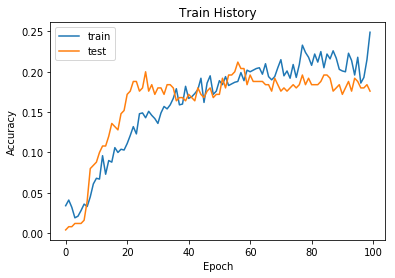

In [169]:
# Tensorflow v1.14
show_train_history('acc','val_acc')

# Tensorflow v1.13
# show_train_history('accuracy','val_accuracy')

In [170]:
for(text, score) in zip(X_test_raw, RNN_model.predict(X_test)):
    print(text)
    print(str(score[0]) + '\n')

還蠻好用的
3.2872543

常常會閃退....
2.9874482

有些小缺點，但整體來說還算好用
3.376718

很不好用，不推薦大家使用
1.6490217

沒用過這麼卡的軟體....
2.047213

介面很友善
1.8217113

事實擺在眼前，何必狡辯！無恥之徒鬼話廢話謊話連篇
1.8068051

打掃比打人簡單，試著學學看吧，加油!!
3.2332702

可憐的基層公務人員，一天最熱的12:00-15:00被關冷氣然後說不缺電的智障總統爽爽吹提出節能關冷氣的高官爽爽吹
2.2504287

了不起，負責!
2.8086543

這關我屁事阿笑死
1.699186

這牌子的啤酒很好喝!
3.4135518

這種藝人還是不要出來秀下限比較好ㄏㄏ
2.2407546

配備拔掉這麼多，還賣這盤子價，台奧不意外
1.2774123

油耗表現不好，不過內裝設計還不錯，勉強可以考慮
2.4060178

技嘉主機板出名的爛你還敢買ㄏㄏ
1.6310565

特斯拉好潮R，想買
1.2989241

超愛玖壹壹!!
3.1775842

太帥啦QQ
1.8307254



### Save Model and Test Function

In [171]:
RNN_model.save("model/RNN/sentiment_VER_1.0_"+datetime.datetime.now().strftime("%Y%m%d")+".h5")

### Load Model and Test Function

In [172]:
import jieba
from keras.preprocessing.sequence import pad_sequences
from keras.models import model_from_json, load_model

jieba.initialize()
jieba.set_dictionary("dict/dict.big.txt")

# maxlen words of sentence for training and prediction
maxlen = 20

def initial_model():
    model = load_model("model/RNN/sentiment_VER_1.0_"+datetime.datetime.now().strftime("%Y%m%d")+".h5")
    with open('model/RNN/train_'+datetime.datetime.now().strftime("%Y%m%d")+'.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)
    return model, tokenizer

def predict_rnn(test):
    return MODEL.predict(test)[0,0]

def preprocess_rnn(string,tokenizer):
    #cut = segmentWord(string)
    cut = []
    for i in range(len(string)):
        cut.append([k + " " for k in jieba.cut(string[i],cut_all=False)])
    for i in range(len(cut)):
        #print(cut[i])
        flatten = ""
        for k in cut[i]:
            flatten += k
        cut[i] = flatten
    result = tokenizer.texts_to_sequences(cut)
    return pad_sequences(result,maxlen=maxlen)

MODEL, PICKLE = initial_model()

In [173]:
sentence = ['我愛台灣','我愛美國','這套軟體不好用','機器學習很難，但是很好用']
try:
    for x in sentence:
        padded_sentence = preprocess_rnn([x],PICKLE)
        score = predict_rnn(padded_sentence)
        opt = str(score)
        print(x+' score is: '+opt)
except Exception as e:
    pass

Building prefix dict from D:\Programming\Python\課程教學\David Python 教育訓練\dict\dict.big.txt ...
2019-12-17 13:16:34,190 : DEBUG : Building prefix dict from D:\Programming\Python\課程教學\David Python 教育訓練\dict\dict.big.txt ...
Loading model from cache C:\Users\princ\AppData\Local\Temp\jieba.u9fe11b2227c896c5bbad65bb17730314.cache
2019-12-17 13:16:34,194 : DEBUG : Loading model from cache C:\Users\princ\AppData\Local\Temp\jieba.u9fe11b2227c896c5bbad65bb17730314.cache
Loading model cost 1.382 seconds.
2019-12-17 13:16:35,575 : DEBUG : Loading model cost 1.382 seconds.
Prefix dict has been built succesfully.
2019-12-17 13:16:35,578 : DEBUG : Prefix dict has been built succesfully.


我愛台灣 score is: 2.399909
我愛美國 score is: 2.246817
這套軟體不好用 score is: 2.6703324
機器學習很難，但是很好用 score is: 3.426031


## Homework

- Is neural network supervised or unsupervised?
- 貼上長篇新聞內容，試試看有無情感分數?
- 思考斷詞之後不在Word2Vec model裡的詞彙，向量為0，如何評分?
- 模擬兩可，倒裝句的測試效果?

Almost all the highly successful neural networks today use supervised training.

This includes FFNN, RNN, LSTM, CNN, U-Net, and GAN.

<a id="Google-Cloud-Natural-Language"></a>
## Google Cloud Natural Language

安裝<br>
pip install --upgrade google-cloud-language <br>
[Google Cloud Natural Language API](https://cloud.google.com/natural-language/docs/quickstarts)<br>
[Python Auth Client](https://cloud.google.com/natural-language/docs/quickstart-client-libraries#client-libraries-install-python)<br>
[Python example](https://cloud.google.com/natural-language/docs/quickstart-client-libraries#client-libraries-install-python)

### Google Cloud Natural Language API examples

[![Open in Cloud Shell][shell_img]][shell_link]

[shell_img]: http://gstatic.com/cloudssh/images/open-btn.png
[shell_link]: https://console.cloud.google.com/cloudshell/open?git_repo=https://github.com/GoogleCloudPlatform/python-docs-samples&page=editor&open_in_editor=language/README.md

This directory contains Python examples that use the
[Google Cloud Natural Language API](https://cloud.google.com/natural-language/).

- [api](api) has a simple command line tool that shows off the API's features.

- [sentiment](sentiment) contains the [Sentiment Analysis
  Tutorial](https://cloud.google.com/natural-language/docs/sentiment-tutorial)
code as used within the documentation.

In [174]:
# Imports the Google Cloud client library
from google.cloud import language_v1

def process_sentiment(annotations):
    score = annotations.document_sentiment.score
    magnitude = annotations.document_sentiment.magnitude

    for index, sentence in enumerate(annotations.sentences):
        sentence_sentiment = sentence.sentiment.score
        print(
            "Sentence {} has a sentiment score of {}".format(index, sentence_sentiment)
        )

    print(
        "Overall Sentiment: score of {} with magnitude of {}".format(score, magnitude)
    )
    return score, magnitude

# The text to analyze
client = language_v1.LanguageServiceClient()
content = u'這是一個非常糟糕的詐騙陷阱軟體，大家要小心不要下載'
document = language_v1.Document(content=content, type_=language_v1.Document.Type.PLAIN_TEXT)
annotations = client.analyze_sentiment(request={'document': document})
score, magnitude = process_sentiment(annotations)
print('Sentiment: {}, {}'.format(score, magnitude))

Text: 這是一個非常糟糕的詐騙陷阱軟體，大家要小心不要下載
Sentiment: -0.8999999761581421, 0.8999999761581421


documentSentiment 提供文件的整體情緒，由下列欄位組成：<br>
- 情緒的 score 範圍介於 -1.0 (負面) 和 1.0 (正面) 之間，可反映文字的整體情緒傾向。
- magnitude 表示指定文字的整體情緒強度 (包括正面和負面)，介於 0.0 和 +inf 之間。與 score 不同的是，magnitude 並無制式標準；只要文字內容出現情緒用字 (無論正負面) 都會提高文字的 magnitude 值 (因此文字篇幅較長，幅度值可能也會較大)。<br>
- language 提供文件的語言資訊，可在初始要求中傳遞，亦可由系統自動偵測 (如果沒有的話)。
- sentences 提供從原始文件中擷取的語句清單，其中包含：
- sentiment 提供各個語句的「語句整體情緒」值，包含上述的 score 和 magnitude 值。

### 分析字串中的情緒
[分析情緒](https://cloud.google.com/natural-language/docs/analyzing-sentiment#language-sentiment-string-python)

In [175]:
# Imports the Google Cloud client library
from google.cloud import language_v1

def process_text(annotations):
    score = annotations.document_sentiment.score
    magnitude = annotations.document_sentiment.magnitude

    sentence_list = []
    for index, sentence in enumerate(annotations.sentences):
        sentence_sentiment = sentence.sentiment.score
        sentence_list.append(sentence)
        print(
            "Sentence {} has a sentiment score of {}".format(index, sentence_sentiment)
        )
    
    return sentence_list

def analyze(content):
    document = language_v1.Document(content=content, type_=language_v1.Document.Type.PLAIN_TEXT)
    annotations = client.analyze_sentiment(request={'document': document})

    # Print the results
    sentence_list = process_text(annotations)
    return sentence_list



In [176]:
# The text to analyze
client = language_v1.LanguageServiceClient()
content = u'宏達電（2498）不斷陷入專利訴訟之中'
document = language_v1.Document(content=content, type_=language_v1.Document.Type.PLAIN_TEXT)
# annotations = client.analyze_sentiment(request={'document': document})
sentence_list = analyze(content)
# score, magnitude = process_sentiment(annotations)
print(sentence_list)

document_sentiment {
  magnitude: 0.30000001192092896
  score: -0.30000001192092896
}
language: "zh-Hant"
sentences {
  text {
    content: "\345\256\217\351\201\224\351\233\273\357\274\2102498\357\274\211\344\270\215\346\226\267\351\231\267\345\205\245\345\260\210\345\210\251\350\250\264\350\250\237\344\271\213\344\270\255"
    begin_offset: -1
  }
  sentiment {
    magnitude: 0.30000001192092896
    score: -0.30000001192092896
  }
}

Score: -0.30000001192092896
Magnitude: 0.30000001192092896


In [177]:
text = '''Crypto Markets Turn Red, takes a Hit Below $8,200'''

r_score, r_magnitude = process_sentiment(text)

print('Score: {}'.format(r_score))
print('Magnitude: {}'.format(r_magnitude))

document_sentiment {
  magnitude: 0.6000000238418579
  score: -0.6000000238418579
}
language: "en"
sentences {
  text {
    content: "Crypto Markets Turn Red, takes a Hit Below $8,200"
    begin_offset: -1
  }
  sentiment {
    magnitude: 0.6000000238418579
    score: -0.6000000238418579
  }
}

Score: -0.6000000238418579
Magnitude: 0.6000000238418579


### Homework
- 短句情感與長句情感如何以現有模型應對?
- 不同產業、是否具有不同模型需要訓練?
- 請提出一份情感判讀的應用一頁簡報